In [18]:
#Importamos las librerias necesarias para el análisis de datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
#Importamos plotly para la visualización de los datos
import plotly.express as px
import plotly.graph_objects as go
import json 
#Librerias para pruebas estadísticas
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import anderson


In [19]:
df = pd.read_csv(r'C:\Users\spide\Desktop\Bootcamp\mi_entorno\Moodulo_2\Proyecto_final_modulo_2\Airbnb_Paris.csv')

# EDA (Exploratory Data Analysis)

## 1 -Visualización General

### 1.1 - Histogramas

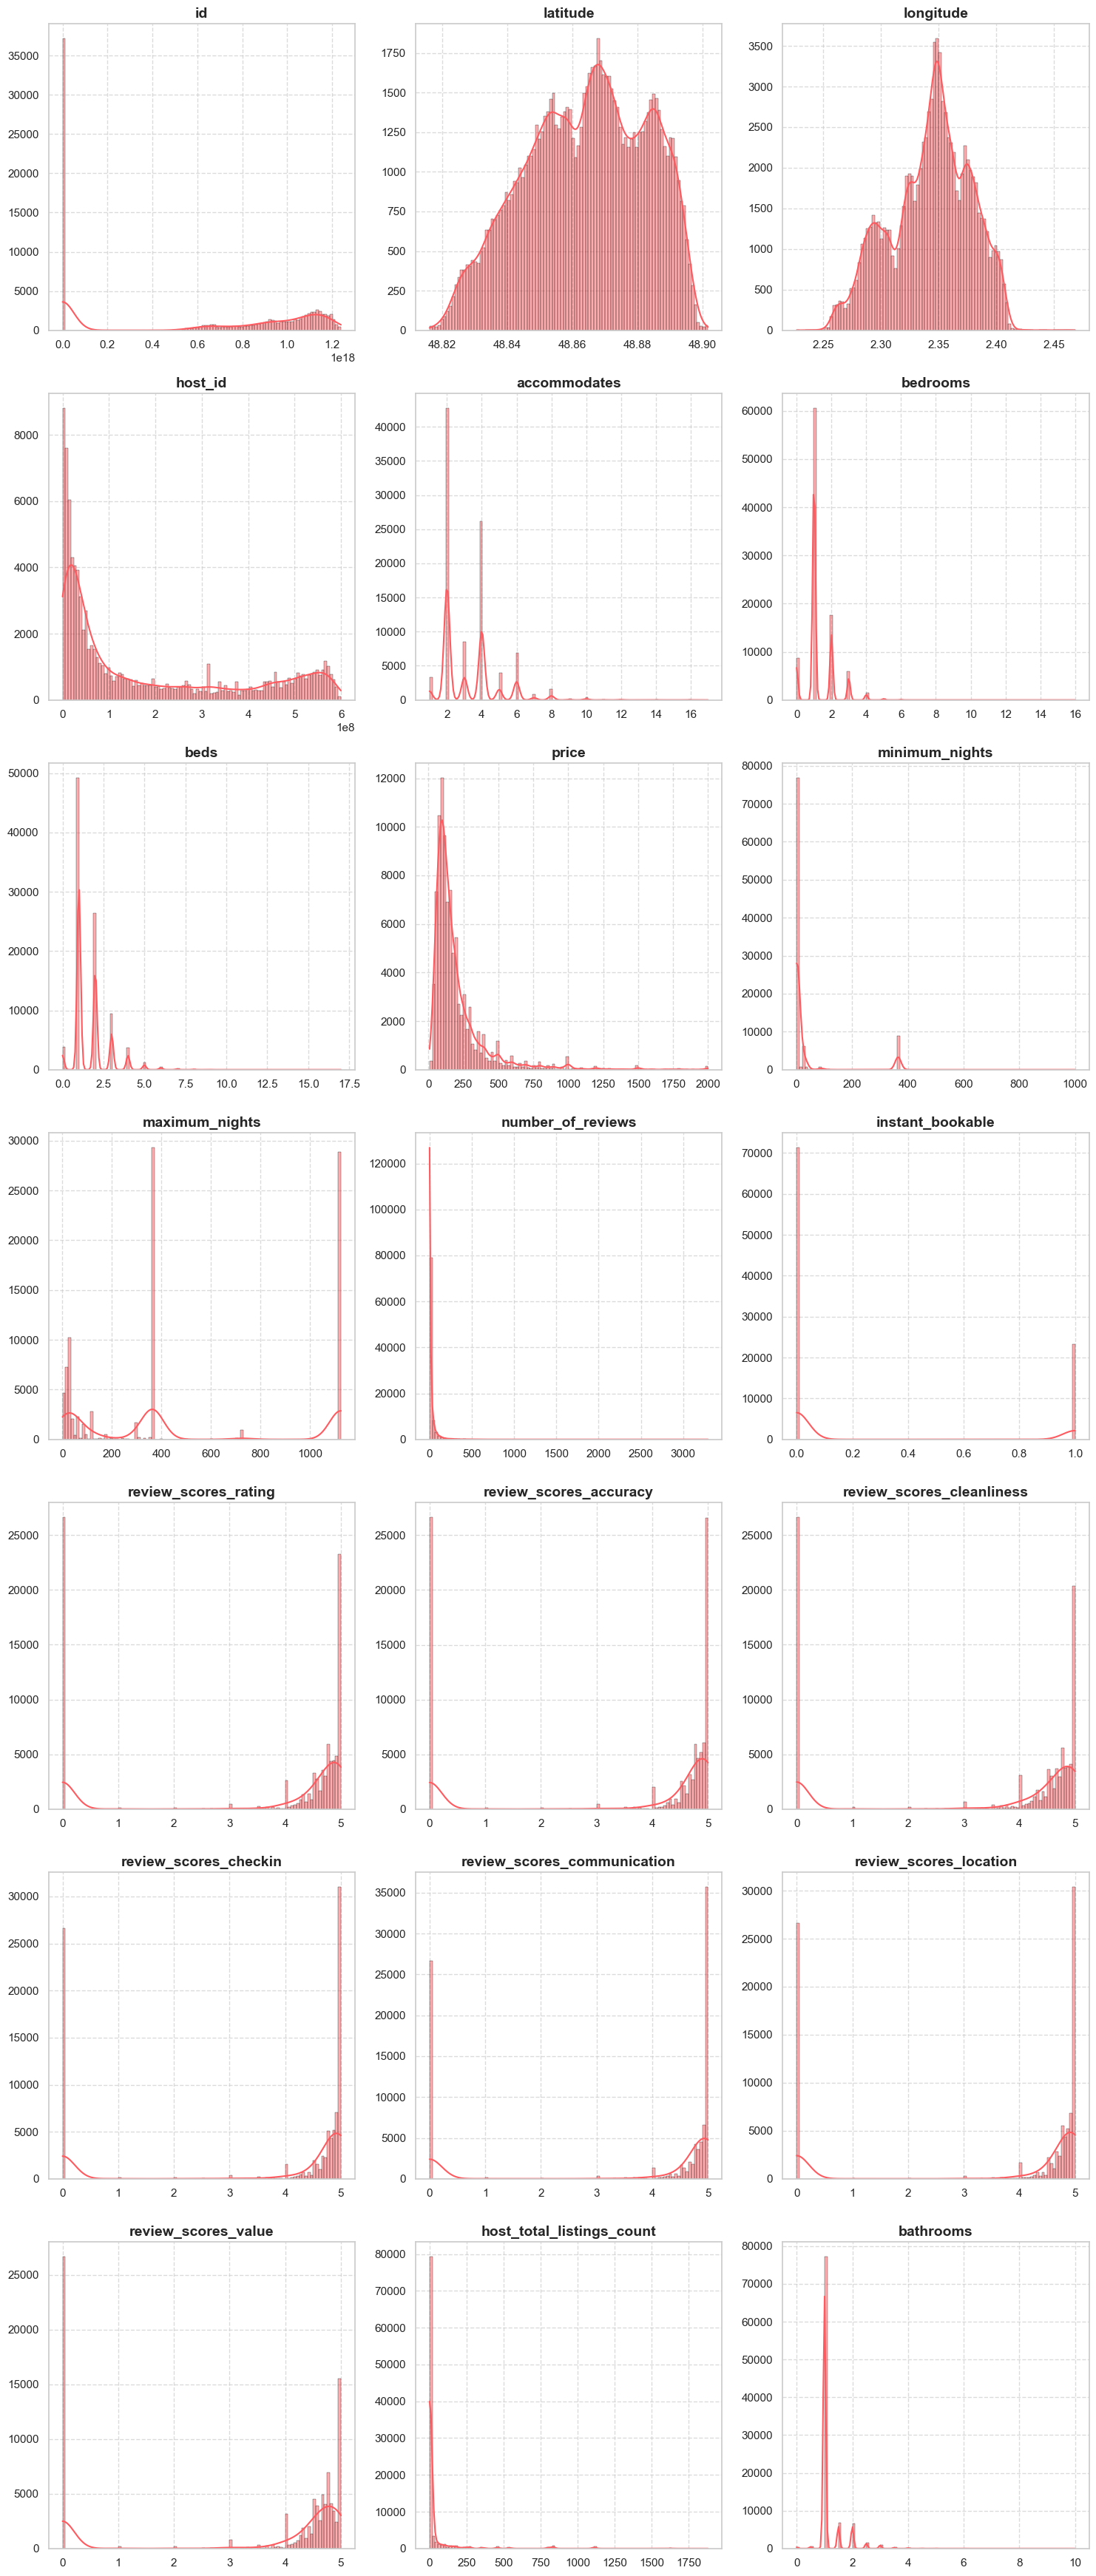

In [20]:
# Seleccionamos las variables numéricas de nuestro dataset
num_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Configuramos el lienzo y los subplots
n_cols = 3  # Número de columnas en la cuadrícula
n_rows = (len(num_vars) + n_cols - 1) // n_cols  # Fórmula para calcular el número de filas necesario

plt.figure(figsize=(15, n_rows * 5))  # Ajustamos el tamaño de la figura al número de filas por 5

# Establecemos el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Iteramos sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Creamos un subplot
    sns.histplot(df[var], kde=True, bins=100, color='#FF5A5F', edgecolor='black')  # Creamos histograma con KDE
    plt.title(var, fontsize=14, fontweight='bold')  # Título del gráfico
    plt.xlabel('')  # Quitamos la etiqueta del eje x
    plt.ylabel('')  # Quitamos la etiqueta del eje y
    plt.grid(True, linestyle='--', alpha=0.7)  # Añadir una cuadrícula

plt.tight_layout()  # Ajustar diseño
plt.show()


### 1.2 - Boxplot

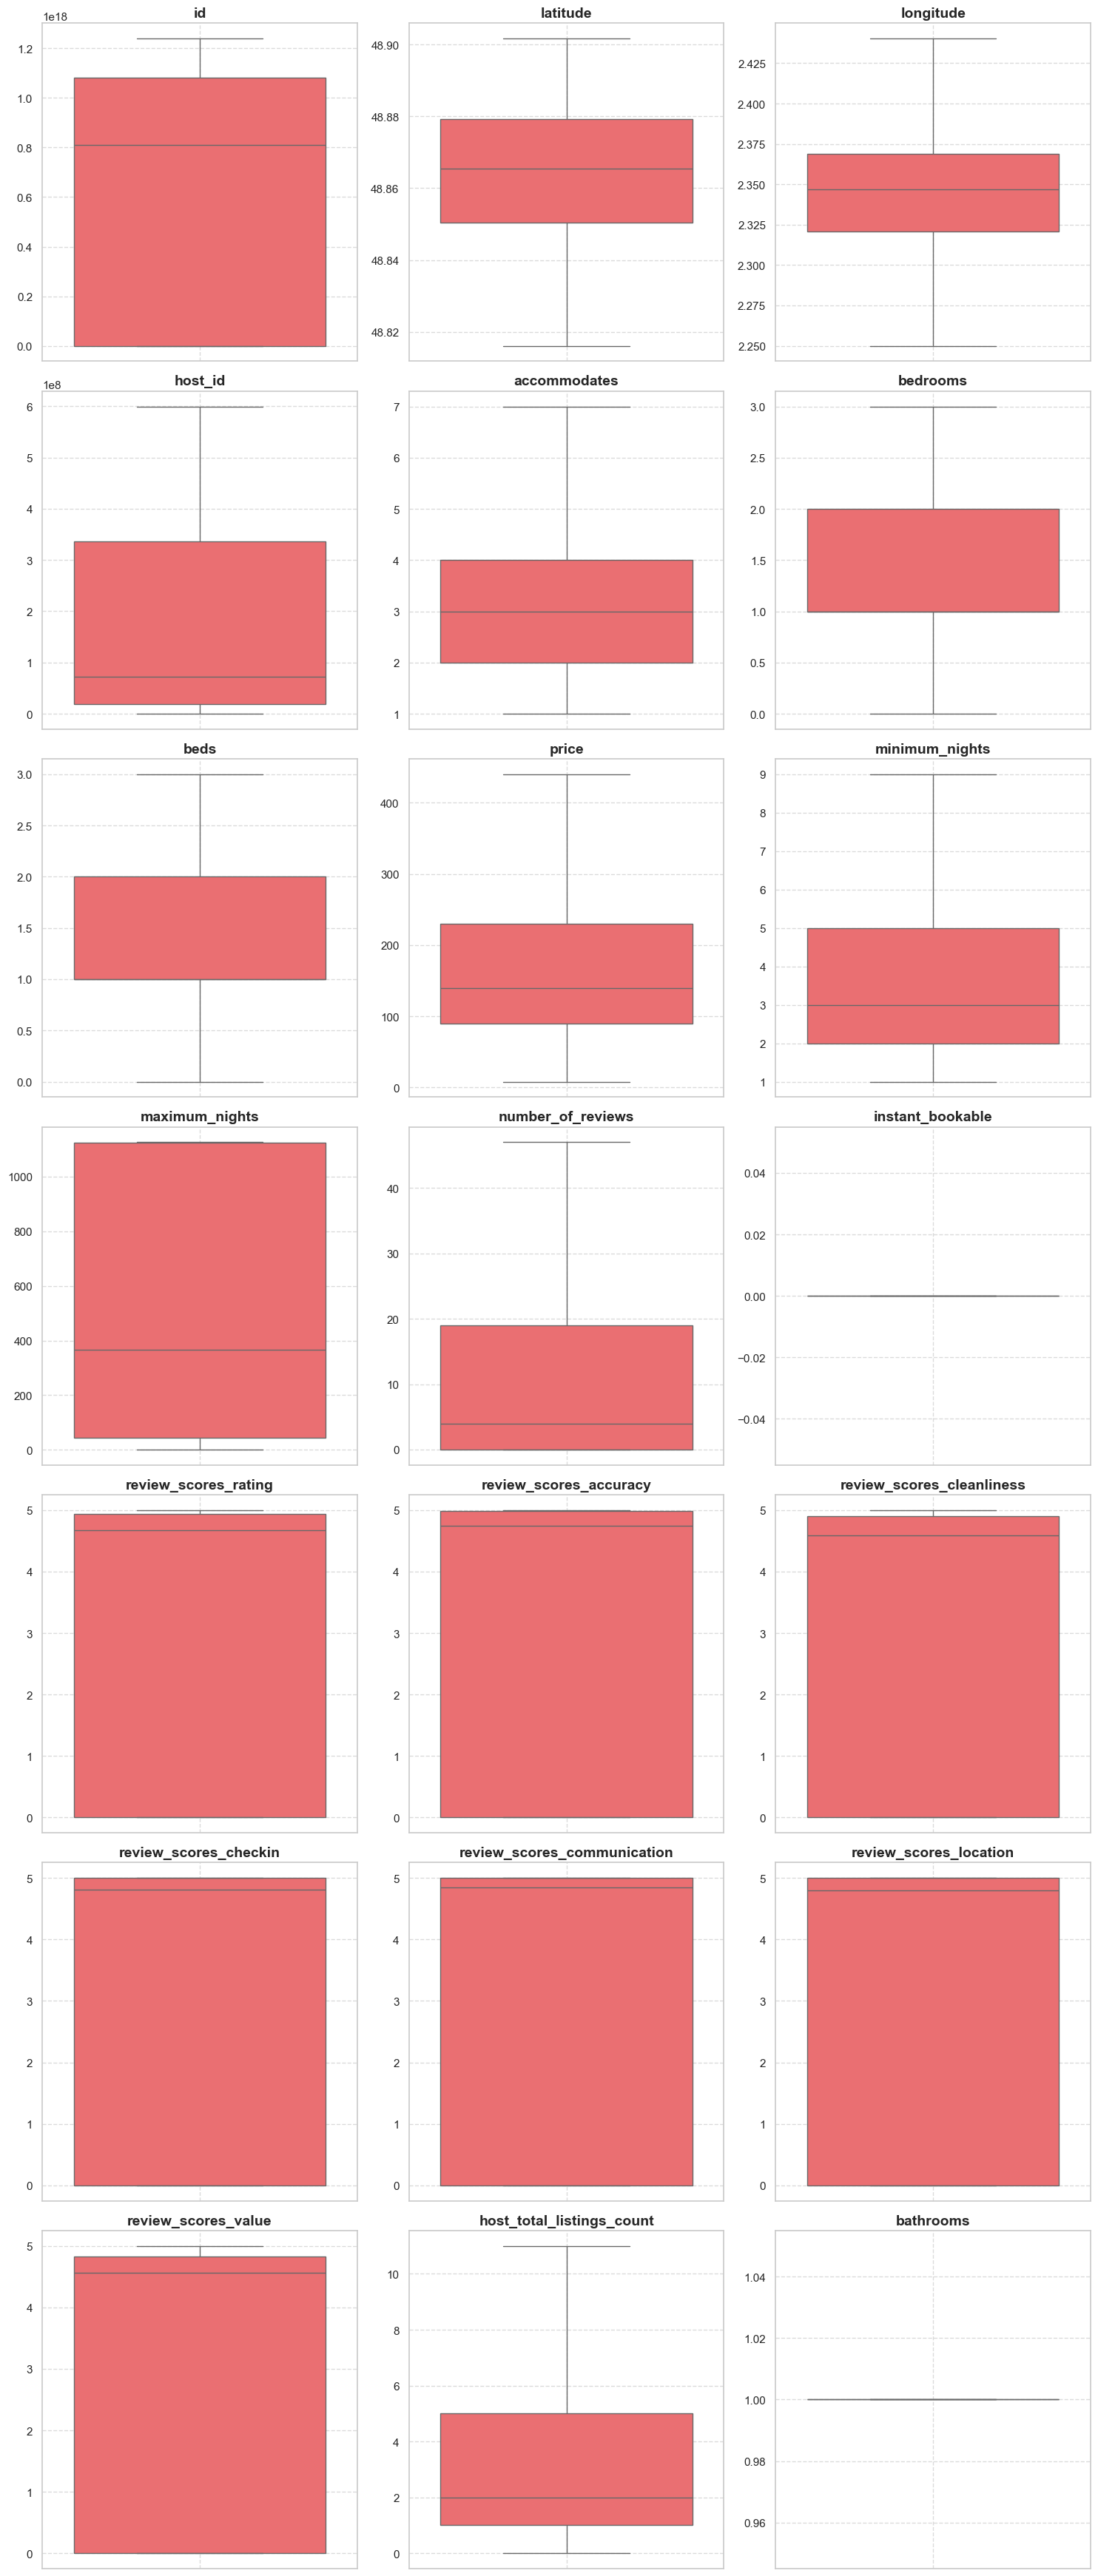

In [21]:
# Seleccionamos las variables numéricas de nuestro dataset
num_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Configuramos el lienzo y los subplots
n_cols = 3  # Número de columnas en la cuadrícula
n_rows = (len(num_vars) + n_cols - 1) // n_cols  # Calcula el número de filas necesario

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura al número de filas por 5

# Establecemos el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Iteramos sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Creamos un subplot
    sns.boxplot(data=df, y=var, color='#FF5A5F', showfliers=False)  # Crear boxplot 
    plt.title(var, fontsize=14, fontweight='bold')  # Título del gráfico
    plt.xlabel('')  # Quitar etiqueta del eje x
    plt.ylabel('')  # Quitar etiqueta del eje y
    plt.grid(True, linestyle='--', alpha=0.7)  # Añadir una cuadrícula

plt.tight_layout()  # Ajustar diseño
plt.show()



Quitamos las filas en las que los baños son superiores a 10 y quitamos las filas en las que el host_total_listings_count es superior a 2000


In [22]:
df.columns

Index(['id', 'listing_url', 'property_type', 'latitude', 'longitude', 'name',
       'host_id', 'host_name', 'host_url', 'has_availability', 'host_since',
       'neighbourhood_cleansed', 'room_type', 'accommodates',
       'host_is_superhost', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_total_listings_count', 'bathrooms',
       'Review?'],
      dtype='object')

## 2 - Precio

### 2.1 - ¿Cuál es el precio promedio por tipo de habitación?

C:\Users\spide\AppData\Local\Temp\ipykernel_22480\1459267007.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\spide\AppData\Local\Temp\ipykernel_22480\1459267007.py:5: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.



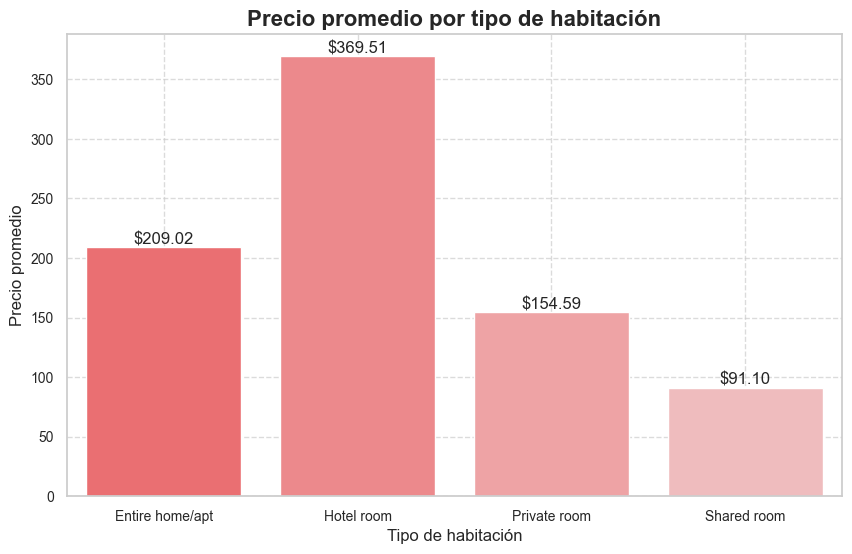

In [23]:
avg_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()  # Calculamos el precio promedio por tipo de alquiler

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=avg_price_by_room_type, palette=sns.light_palette("#FF5A5F", reverse=True, as_cmap=False))
plt.title('Precio promedio por tipo de habitación', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de habitación', fontsize=12)
plt.ylabel('Precio promedio', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
# Etiquetas de datos
for index, value in enumerate(avg_price_by_room_type['price']):
    plt.text(index, value, f'${value:.2f}', ha='center', va='bottom')

plt.show()


Vemos que el mayor promedio de precio te lo da la habitación de hotel, seguido de un apartamento entero. Como era de esperar lo que son Habitaciones privadas y compartidas serán las más baratas. Vamos a ver como se distribuye el precio en los hoteles.

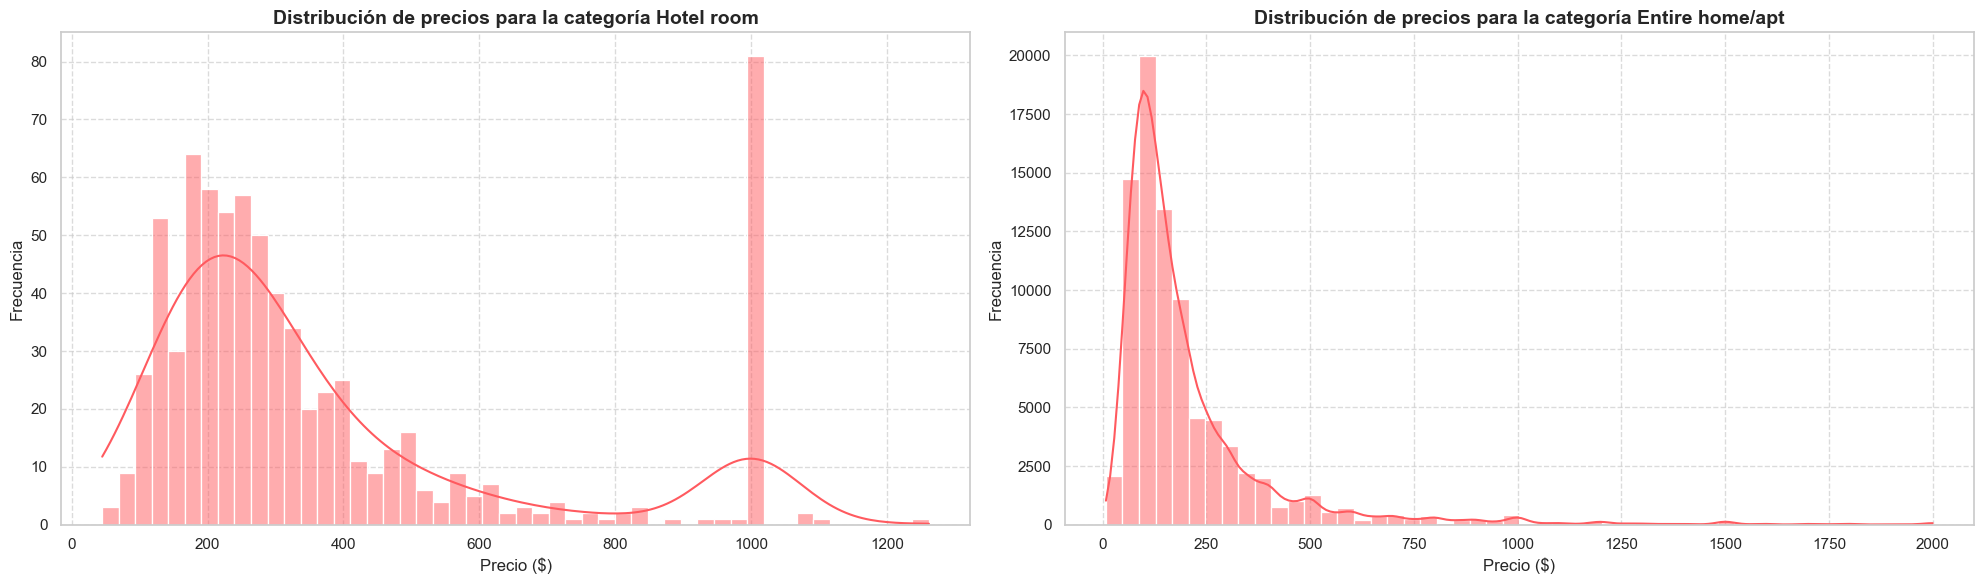

In [24]:
# Filtramos el df para las habitaciones de hotel.
hotel_room_prices = df[df['room_type'] == 'Hotel room']['price']
# Filtramos el df para los apartamentos enteros.
entire_apt_prices = df[df['room_type'] == 'Entire home/apt']['price']  

# Creamos los subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Histograma para los precios de habitaciones de hotel
sns.histplot(hotel_room_prices, kde=True, bins=50, ax=axes[0], color='#FF5A5F')
axes[0].set_title('Distribución de precios para la categoría Hotel room', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Precio ($)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Histograma para los precios de apartamentos enteros
sns.histplot(entire_apt_prices, kde=True, bins=50, ax=axes[1], color='#FF5A5F')
axes[1].set_title('Distribución de precios para la categoría Entire home/apt', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Precio ($)', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Se observa que hay alrededor de 80 apartamentos con un precio superior a los 1000$, lo que hace aumentar el promedio del precio en esta categoría. Por lo que es un indicativo de que, **en general las habitaciones de hotel pueden llegar a ser más costosas que los apartamentos enteros**.

### 2.2 - ¿Cómo varía el precio promedio por barrio?

In [25]:
# Calcular el precio promedio por barrio
avg_price_by_neighbourhood = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Crear el treemap con etiquetas de datos
fig = px.treemap(avg_price_by_neighbourhood, path=['neighbourhood_cleansed'], values='price', 
                 title='Precio promedio por barrio', 
                 color='price', color_continuous_scale=px.colors.sequential.Reds,  # Escala de colores basada en #FF5A5F
                 hover_data={'price': ':.2f'},
                 width=1200, height=800)  # Ajustar el tamaño de la figura

# Actualizar las trazas para mostrar el texto
fig.update_traces(texttemplate='%{label}<br>€%{value:.2f}', textposition='middle center')

# Mostrar el gráfico
fig.show()

* **Élysée** es el más caro con diferencia, seguido de **Palais-Bourbon** y **Passy**
* Entre **Observatoire**, **Popincourt** y **Reulli** tenemos precios similares rondando los 170-160 $ la noche.
* Los dos más baratos són **Buttes-Chaumont** y **Menilmontant**.

### 2.3 - ¿Cómo varía el precio del alojamiento si son o no instantáneamente reservables?


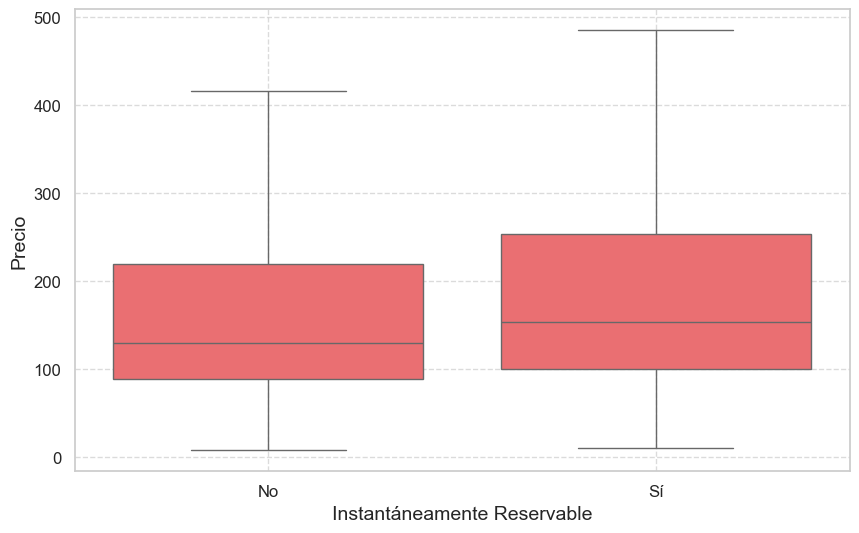

In [26]:
# Crear un boxplot para comparar el precio según si es instantáneamente reservable o no
plt.figure(figsize=(10, 6))
sns.boxplot(x='instant_bookable', y='price', data=df, showfliers=False, color='#FF5A5F')
plt.xlabel('Instantáneamente Reservable', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.xticks([0, 1], ['No', 'Sí'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

A priori parece que la mediana en los que són  instantaneamente reservables es ligeramente superior a los que no, al igual que su tercer cuartil, por lo que es esperable que sea un poco superior (sin tener en cuenta los outliers poniendo *False* en el argumento *showfliers*). Sin embargo ambas categorías presentan una gran cantidad de outliers así que para tener más precisión compararemos su promedio mediante pruebas estadísticas.


C:\Users\spide\AppData\Local\Temp\ipykernel_22480\3463279197.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\spide\AppData\Local\Temp\ipykernel_22480\3463279197.py:6: UserWarning:


The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.



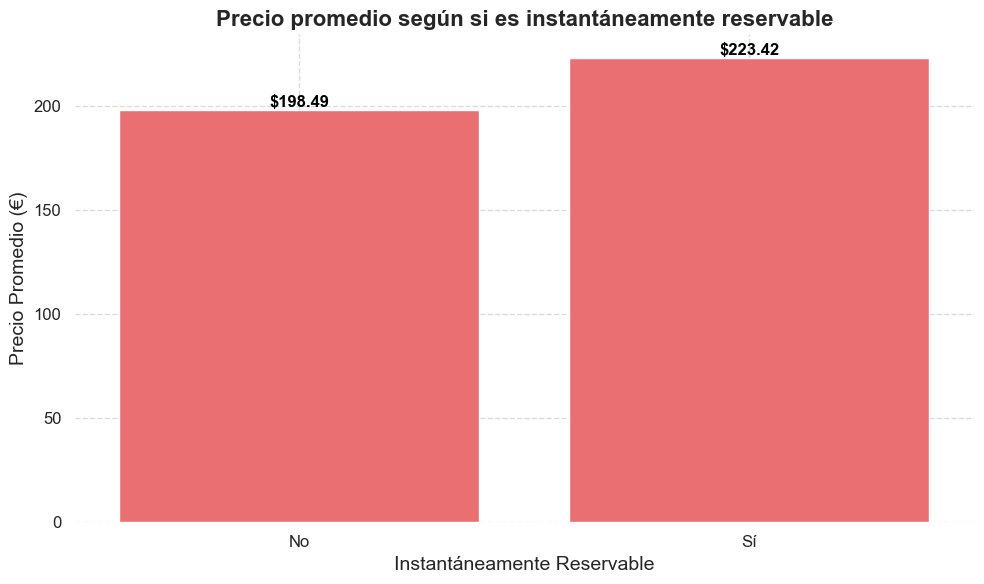

In [27]:
# Calculamos el precio promedio según si es instantáneamente reservable o no
avg_price_instant_bookable = df.groupby('instant_bookable')['price'].mean().reset_index()

# Creamos un gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='instant_bookable', y='price', data=avg_price_instant_bookable, palette=['#FF5A5F'])
plt.title('Precio promedio según si es instantáneamente reservable', fontsize=16, fontweight='bold')
plt.xlabel('Instantáneamente Reservable', fontsize=14)
plt.ylabel('Precio Promedio (€)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas de datos
for index, value in enumerate(avg_price_instant_bookable['price']):
    plt.text(index, value, f'${value:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Mejorar la estética del gráfico
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [28]:
df['instant_bookable'].value_counts()

instant_bookable
0    71298
1    23342
Name: count, dtype: int64

In [29]:
# Creamos los dos conjuntos de datos para comparar los precios
instant_bookable_false = df[df['instant_bookable'] == 0][['price']]
instant_bookable_true = df[df['instant_bookable'] == 1][['price']]


In [61]:

from scipy.stats import anderson, levene, ttest_ind, mannwhitneyu

def diagrama_flujo_test_hipótesis_Anderson_Darling(conjunto1, conjunto2, alpha=0.05):
    """
    Realiza una serie de pruebas estadísticas comenzando con Anderson-Darling
    y devuelve las conclusiones en formato de texto.

    Parámetros:
        conjunto1, conjunto2: listas o arrays unidimensionales de datos.
        alpha: nivel de significancia para las pruebas.

    Retorna:
        conclusiones: lista de strings con las conclusiones.
    """
    # Convertir los conjuntos a arrays unidimensionales si son DataFrames o Series
    if isinstance(conjunto1, pd.DataFrame) or isinstance(conjunto1, pd.Series):
        conjunto1 = conjunto1.values.flatten()
    if isinstance(conjunto2, pd.DataFrame) or isinstance(conjunto2, pd.Series):
        conjunto2 = conjunto2.values.flatten()
        
        '''En primer lugar se realiza una prueba de Anderson-Darling para determinar si los datos siguen una distribución normal
    Librerías necesarias: 
    from scipy.stats import anderson

    OJO: La prueba de Anderson-Darling en esta función espera una lista o un array unidimensional, no funcionará con un DataFrame
    o una Serie de pandas, por lo que es necesario pasar los datos como una lista o un array.
    '''
    # Inicializar lista de conclusiones
    conclusiones = []

    # Prueba de Anderson-Darling
    stat_1, crit_1, sig_1 = anderson(conjunto1)
    stat_2, crit_2, sig_2 = anderson(conjunto2)
    conclusiones.append(f"Estadístico Anderson-Darling (Conjunto 1): {stat_1:.3f}")
    conclusiones.append(f"Estadístico Anderson-Darling (Conjunto 2): {stat_2:.3f}")
    conclusiones.append(f"Valor crítico (5%): {crit_1[2]:.3f}")

    if stat_1 < crit_1[2] and stat_2 < crit_2[2]:  # Usamos el valor crítico para 5%
        '''La lista de valores críticos (crit_price y crit_reviews) contiene los valores críticos para diferentes niveles de significancia 
        (15%, 10%, 5%, 2.5%, y 1%).El índice [2] corresponde al valor crítico para el nivel de significancia del 5%.'''
        
        print('Ambos conjuntos siguen una distribución normal')

        '''En el caso de que siga una distribución normal se realiza una prueba de Levene para determinar si las varianzas son iguales
        Librerías necesarias:
        from scipy.stats import levene
        ''' 
        conclusiones.append("Ambos conjuntos siguen una distribución normal.")

        # Prueba de Levene para igualdad de varianzas
        stat_levene, p_levene = levene(conjunto1, conjunto2)
        conclusiones.append(f"Prueba de Levene: Estadístico={stat_levene:.3f}, P-valor={p_levene:.3f}")
        
        if p_levene > alpha:
            conclusiones.append("Varianzas iguales. Realizamos prueba t de Student con varianzas iguales.")

            '''En el caso de que las varianzas sean iguales se realiza una prueba t de Student
            Librerías necesarias:
            from scipy.stats import ttest_ind
            '''
            
            # Prueba t de Student con varianzas iguales
            stat_t, p_t = ttest_ind(conjunto1, conjunto2, equal_var=True)
            conclusiones.append(f"Prueba t de Student: Estadístico={stat_t:.3f}, P-valor={p_t:.3f}")
            if p_t < alpha:
                conclusiones.append("Se rechaza H0: Existen diferencias significativas entre los dos conjuntos.")
            else:
                conclusiones.append("No se rechaza H0: No hay diferencias significativas entre los dos conjuntos.")
        else:
            conclusiones.append("Varianzas diferentes. Realizamos prueba t de Student con varianzas diferentes.")

            '''En el caso de que las varianzas sean diferentes se realiza una prueba t de Student
            Librerías necesarias:
            from scipy.stats import ttest_ind
            '''

            # Prueba t de Student con varianzas diferentes
            stat_t, p_t = ttest_ind(conjunto1, conjunto2, equal_var=False)
            conclusiones.append(f"Prueba t de Student: Estadístico={stat_t:.3f}, P-valor={p_t:.3f}")
            if p_t < alpha:
                conclusiones.append("Se rechaza H0: Existen diferencias significativas entre los dos conjuntos.")
            else:
                conclusiones.append("No se rechaza H0: No hay diferencias significativas entre los dos conjuntos.")
    else:

        '''En el caso de que no siga una distribución normal se realiza una prueba de Mann-Whitney
        Librerías necesarias:
        from scipy.stats import mannwhitneyu
        '''
        conclusiones.append("Ambos conjuntos no siguen una distribución normal. Realizamos prueba de Mann-Whitney.")

        # Prueba de Mann-Whitney
        stat_mw, p_mw = mannwhitneyu(conjunto1, conjunto2)
        conclusiones.append(f"Prueba de Mann-Whitney: Estadístico={stat_mw:.3f}, P-valor={p_mw:.3f}")
        if p_mw < alpha:
            conclusiones.append("Se rechaza H0: Existen diferencias significativas entre los dos conjuntos.")
        else:
            conclusiones.append("No se rechaza H0: No hay diferencias significativas entre los dos conjuntos.")
    # Convertir las conclusiones a DataFrame
    conclusiones_df = pd.DataFrame(conclusiones, columns=['Conclusiones'])   
    return conclusiones



diagrama_flujo_test_hipótesis_Anderson_Darling(instant_bookable_false,instant_bookable_true, alpha = 0.05)

['Estadístico Anderson-Darling (Conjunto 1): 7403.921',
 'Estadístico Anderson-Darling (Conjunto 2): 2137.764',
 'Valor crítico (5%): 0.787',
 'Ambos conjuntos no siguen una distribución normal. Realizamos prueba de Mann-Whitney.',
 'Prueba de Mann-Whitney: Estadístico=736363381.500, P-valor=0.000',
 'Se rechaza H0: Existen diferencias significativas entre los dos conjuntos.']

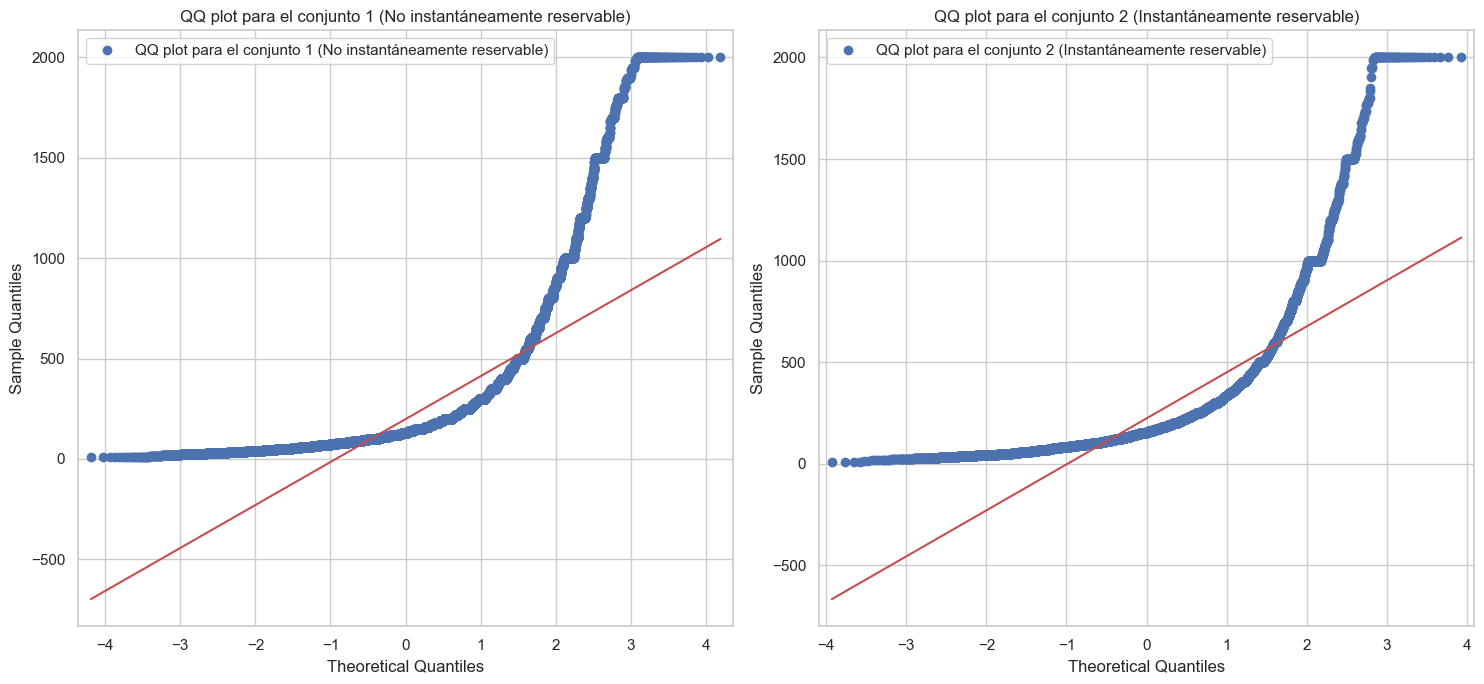

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def generar_qqplot(conjunto, titulo, ax):
    sm.qqplot(conjunto, line='s', ax=ax)
    ax.set_title(titulo)
    ax.legend([titulo])

# Asegúrate de pasar solo los valores de la columna 'price' como un array unidimensional
instant_bookable_false = df[df['instant_bookable'] == 0]['price'].values
instant_bookable_true = df[df['instant_bookable'] == 1]['price'].values

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Generar QQ plots para ambos conjuntos
generar_qqplot(instant_bookable_false, 'QQ plot para el conjunto 1 (No instantáneamente reservable)', axes[0])
generar_qqplot(instant_bookable_true, 'QQ plot para el conjunto 2 (Instantáneamente reservable)', axes[1])

plt.tight_layout()
plt.show()

La línea roja representa una distribución normal, como vemos nuestros datos se alejan bastante de esta distribución normal por lo que no la siguen

### 2.4 - ¿Cómo varía el precio según accommodates?


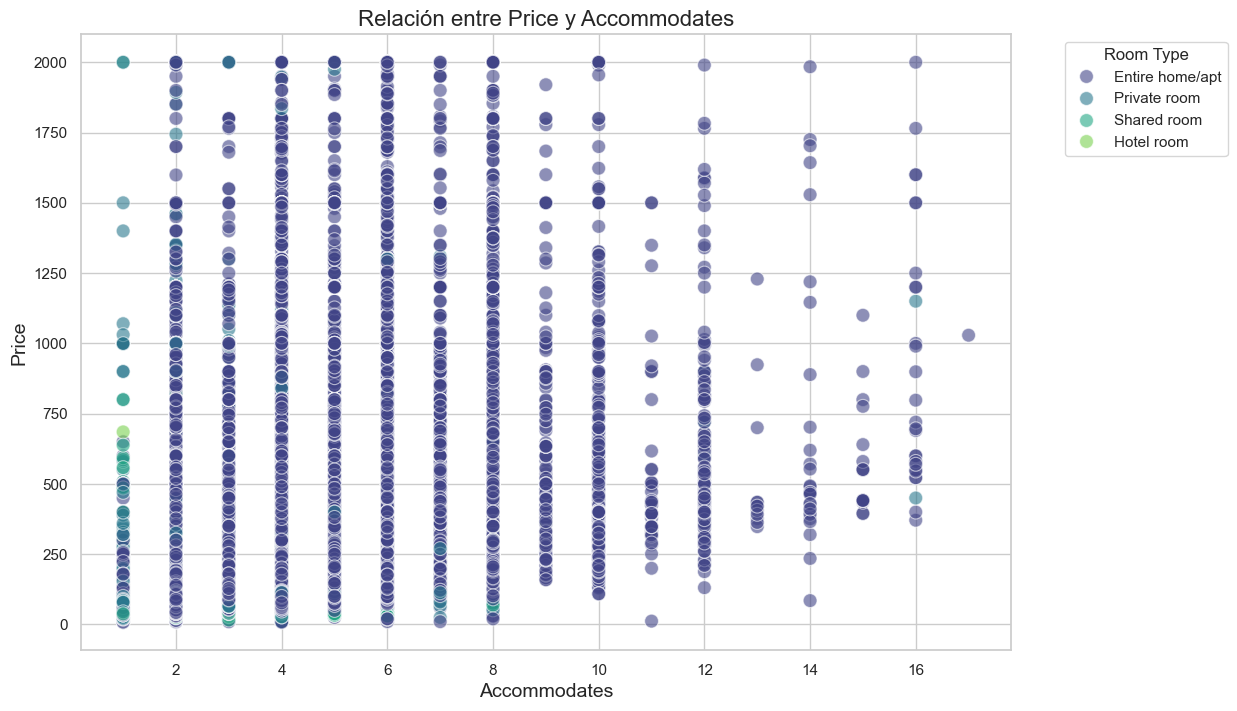

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='accommodates', y='price', hue='room_type', palette='viridis', alpha=0.6, s=100)
plt.title('Relación entre Price y Accommodates', fontsize=16)
plt.xlabel('Accommodates', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Podemos observar una leve tendencia a que a mayor capacidad de el alojamiento más elevado es el precio, sin embargo también se observa una alta dispersión en los precios para cada nivel de capacidad, lo que indica que existen otros factores influyentes en el precio

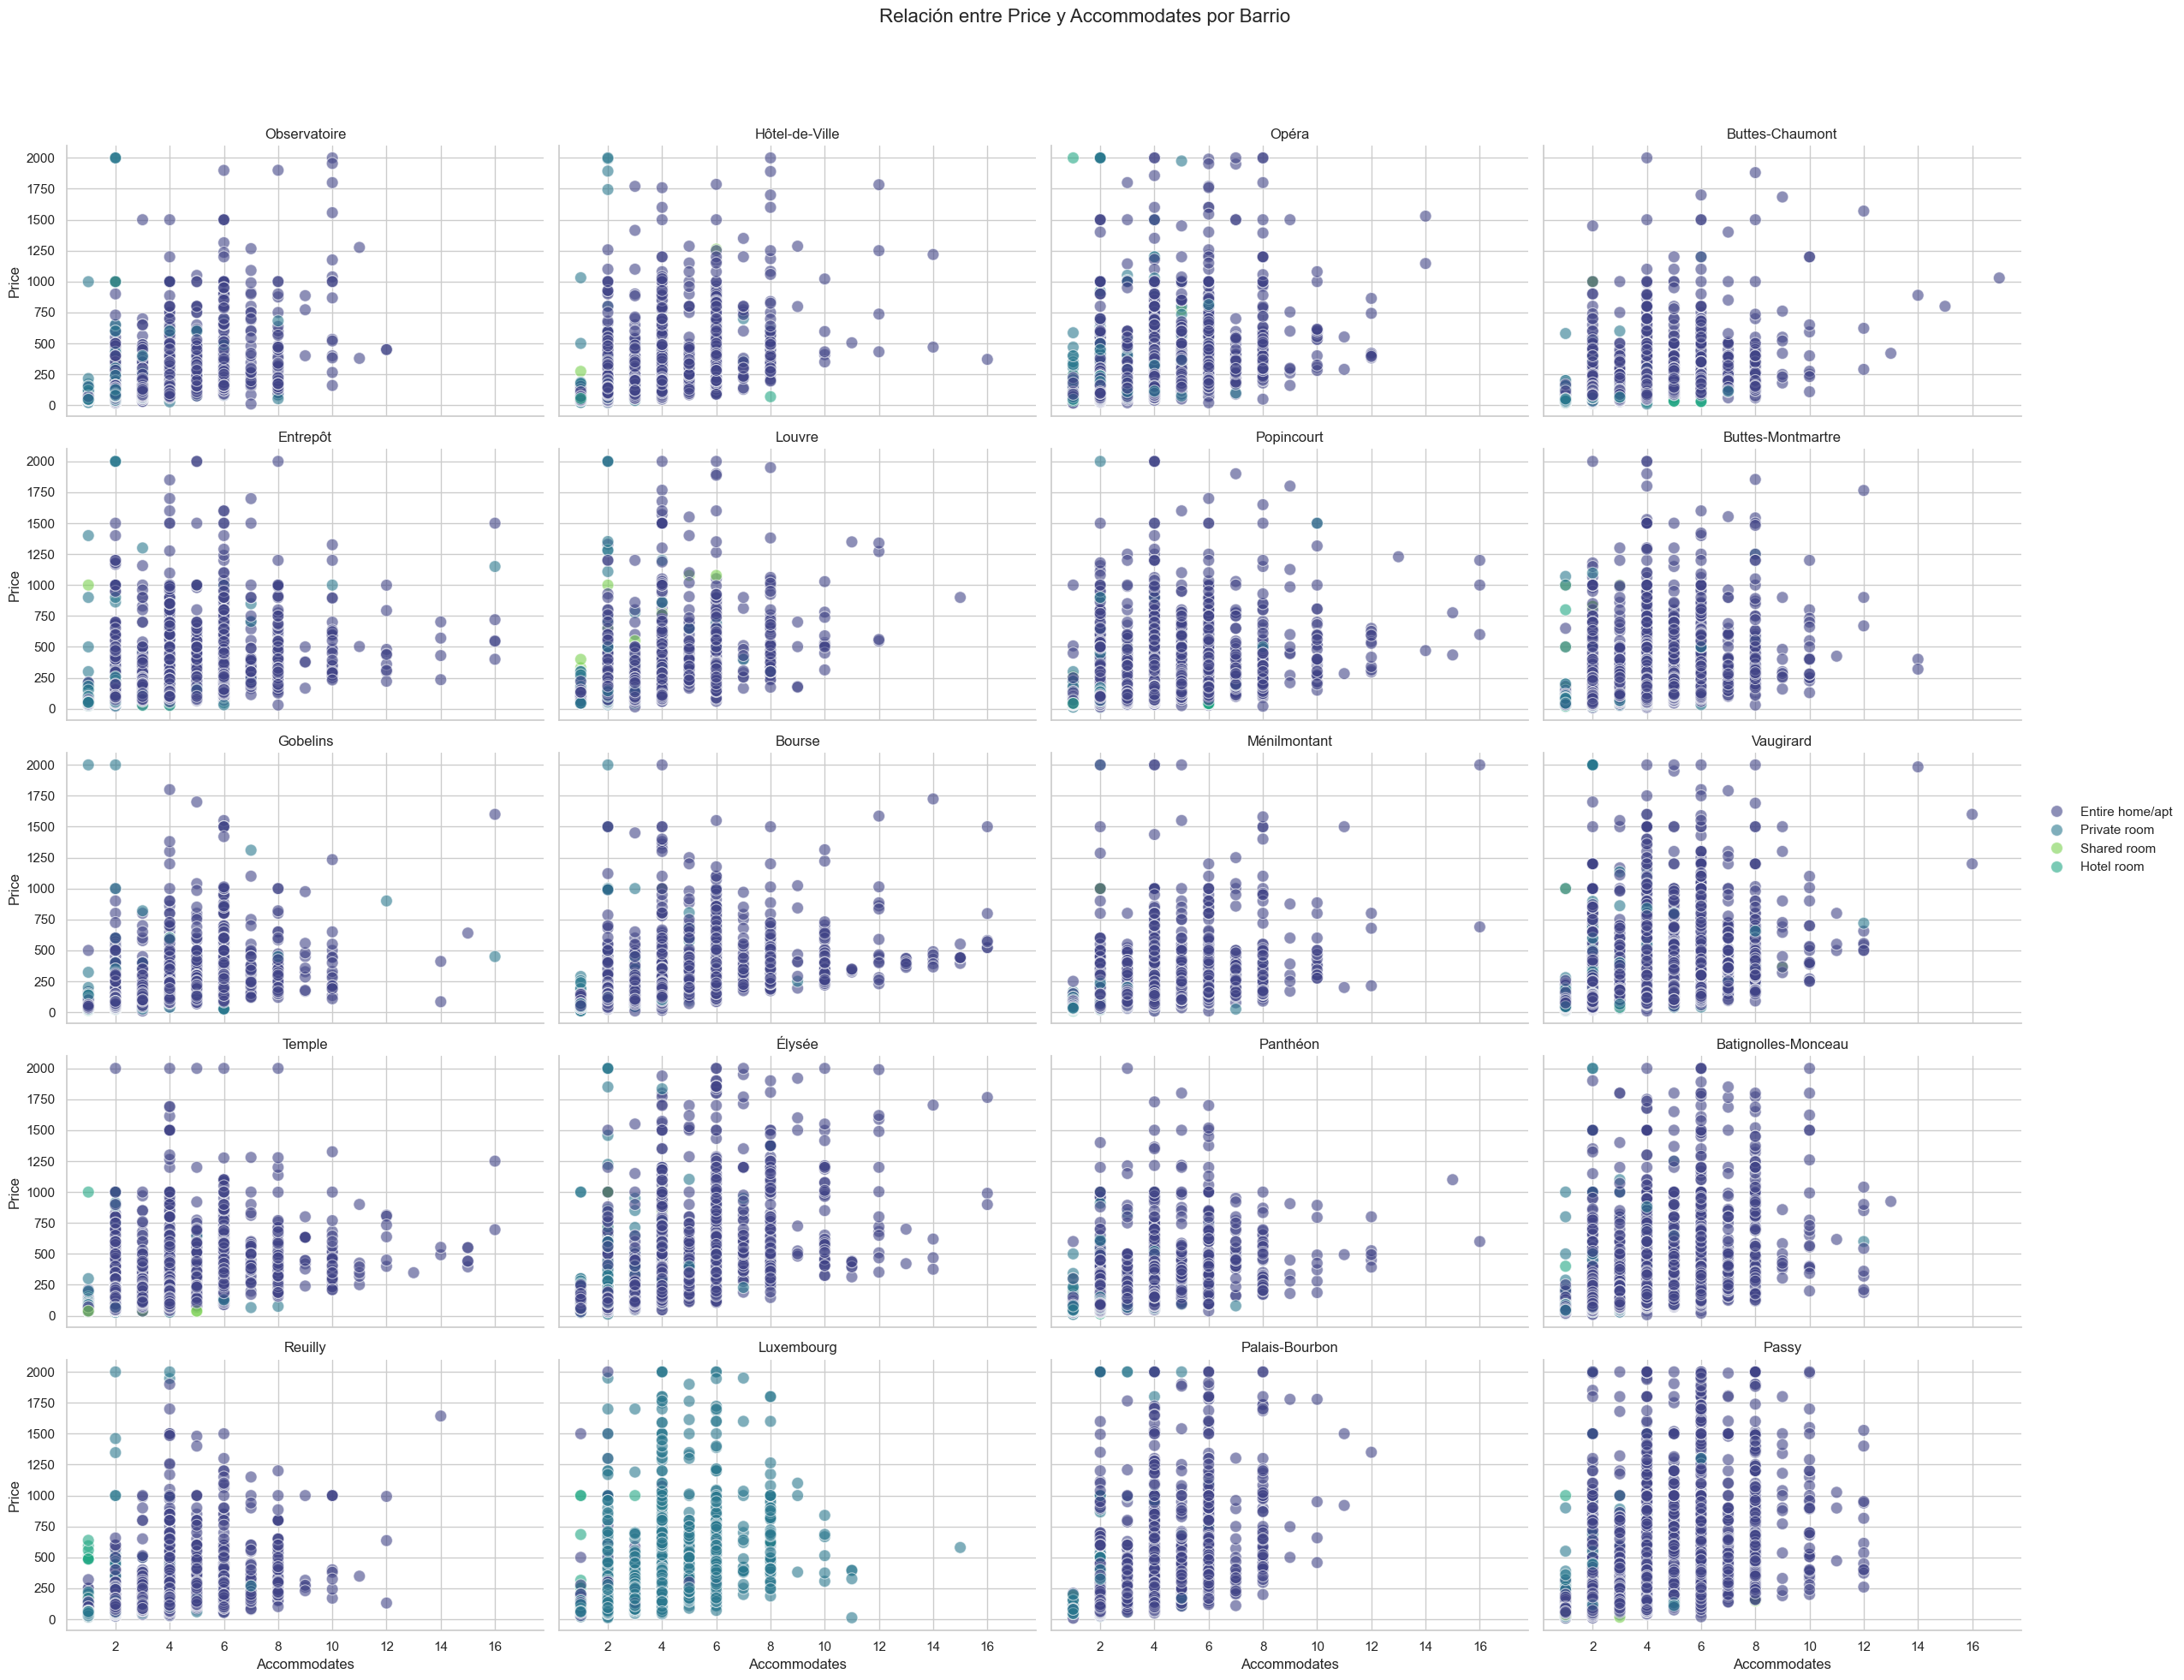

In [33]:

# Crear el FacetGrid
g = sns.FacetGrid(df, col="neighbourhood_cleansed", col_wrap=4, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='accommodates', y='price', hue='room_type', palette='viridis', alpha=0.6, s=100)

# Añadir títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("Accommodates", "Price")

# Añadir leyenda
g.add_legend()

# Ajustar el diseño
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relación entre Price y Accommodates por Barrio', fontsize=16)

# Mostrar el gráfico
plt.show()

C:\Users\spide\AppData\Local\Temp\ipykernel_22480\2698437.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\spide\AppData\Local\Temp\ipykernel_22480\2698437.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




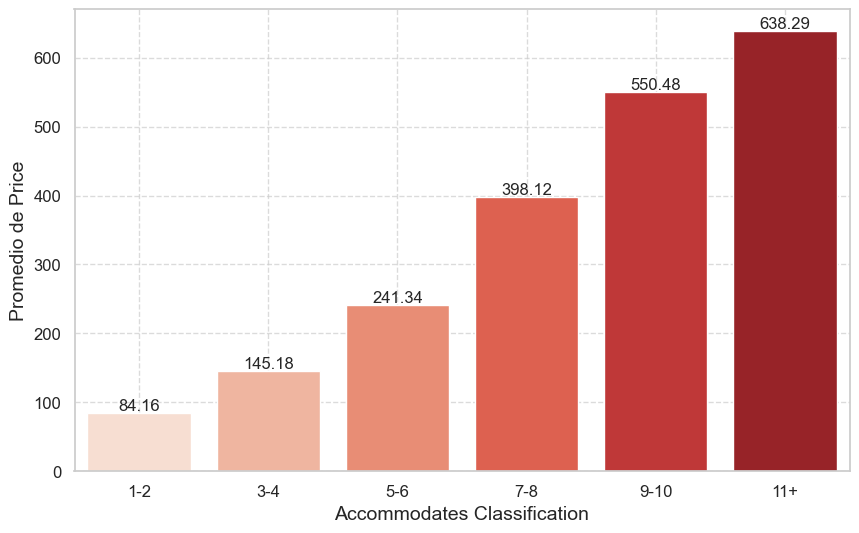

In [34]:
# Definimos los intervalos y las etiquetas para la clasificación de accommodates	
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['1-2', '3-4', '5-6', '7-8', '9-10', '11+']

# Creamos la nueva columna accommodates_clasification
df['accommodates_clasification'] = pd.cut(df['accommodates'], bins=bins, labels=labels, right=False)

# Calcular el promedio de price por accommodates_clasification
avg_price_by_accommodates = df.groupby('accommodates_clasification')['price'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates_clasification', y='price', data=avg_price_by_accommodates, palette='Reds')
plt.xlabel('Accommodates Classification', fontsize=14)
plt.ylabel('Promedio de Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas de datos
for index, value in enumerate(avg_price_by_accommodates['price']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### 2.5 -¿Qué factores influyen más en el precio?

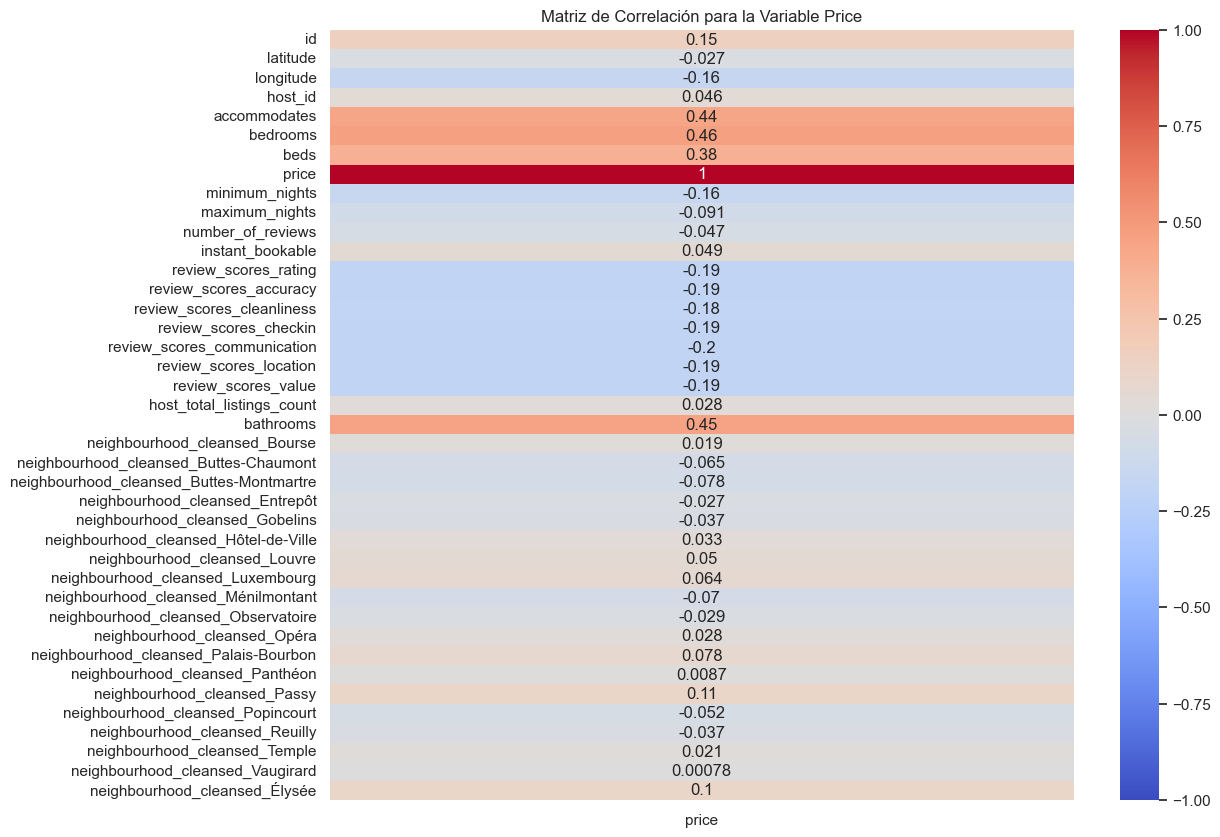

In [35]:
# Crear una copia del dataframe
df_copy = df.copy()

# Convertir la variable categórica 'neighbourhood_cleansed' en variables dummy
df_copy = pd.get_dummies(df_copy, columns=['neighbourhood_cleansed'], drop_first=True, dtype=int)

# Seleccionar solo las columnas numéricas
numeric_cols = df_copy.select_dtypes(include=[np.number]).columns

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = df_copy[numeric_cols].corr()

# Filtrar la matriz de correlación para incluir solo la variable 'price'
correlation_matrix_price = correlation_matrix[['price']]

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_price, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para la Variable Price')
plt.show()

Podemos observar que lo que más afecta al precio es el numero de viajeros, las habitaciones, las camas y los baños. 

Pese a que los barrios no tienen una correlación fuerte con el precio, podemos observar que aquellos en los que el promedio de precio era más elevado presentan una correlación más fuerte que el resto de barrios, como el caso de Passy y Élysée.

## 3 - Reseñas

In [36]:
df['Review?'].value_counts()    

Review?
Con review    68028
Sin review    26612
Name: count, dtype: int64

In [37]:
df.columns

Index(['id', 'listing_url', 'property_type', 'latitude', 'longitude', 'name',
       'host_id', 'host_name', 'host_url', 'has_availability', 'host_since',
       'neighbourhood_cleansed', 'room_type', 'accommodates',
       'host_is_superhost', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_total_listings_count', 'bathrooms',
       'Review?', 'accommodates_clasification'],
      dtype='object')

In [38]:
'''En primer lugar, para analizar los alquileres según la reseña, tenemos que crear un dataframe con las columnas de 
interés y solo para aquellas filas que tengan reseñas, basándonos en la columna 'Review?'''

# Creamos un DataFrame con las columnas de interés y solo para las filas con reseñas
df_reviews = df[df['Review?']=='Con review'][['id','listing_url','review_scores_rating', 'review_scores_accuracy', 
                                                       'review_scores_cleanliness', 'review_scores_checkin', 
                                                       'review_scores_communication', 'review_scores_location', 
                                                       'review_scores_value','price','neighbourhood_cleansed','latitude','longitude',
                                                       'host_is_superhost','host_since','host_id']]


### 3.1 - ¿Qué barrio tiene las mejores puntuaciones promedio?

C:\Users\spide\AppData\Local\Temp\ipykernel_22480\71281562.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




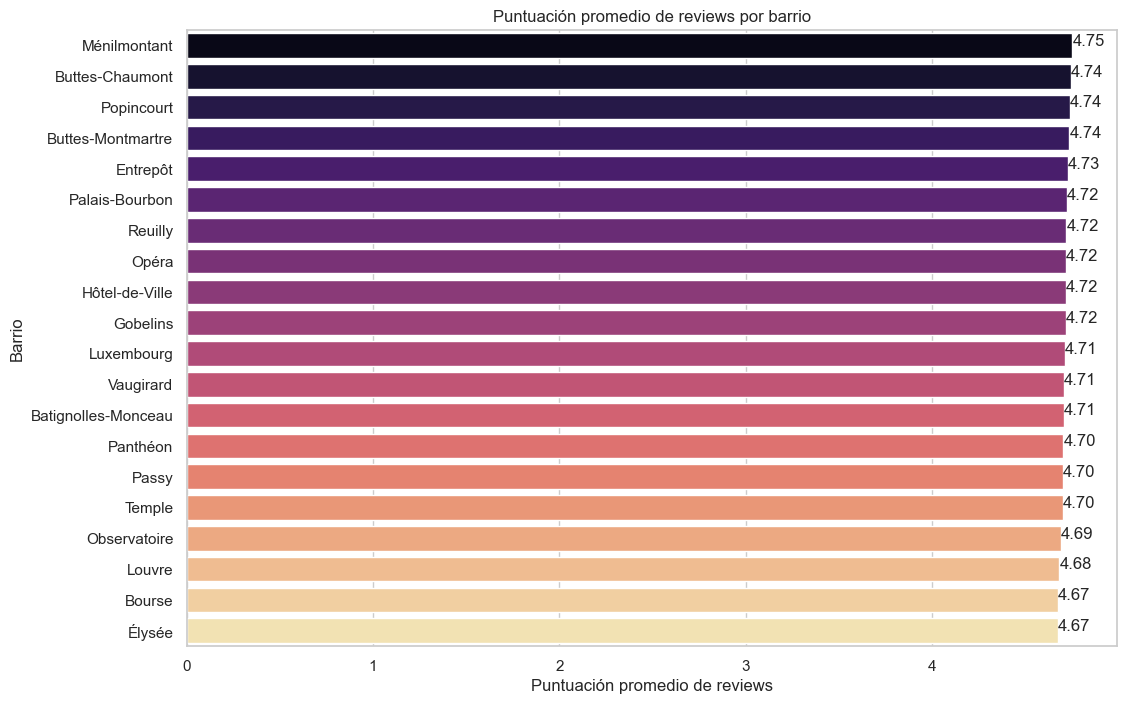

In [39]:
# Calcular la puntuación promedio de reviews por barrio
avg_reviews_by_neighbourhood = df_reviews.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index()

# Ordenar los barrios por la puntuación promedio de reviews
avg_reviews_by_neighbourhood = avg_reviews_by_neighbourhood.sort_values(by='review_scores_rating', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=avg_reviews_by_neighbourhood, palette='magma')
plt.title('Puntuación promedio de reviews por barrio')
plt.xlabel('Puntuación promedio de reviews')
plt.ylabel('Barrio')

# Añadir etiquetas de datos
for index, value in enumerate(avg_reviews_by_neighbourhood['review_scores_rating']):
    plt.text(value, index, f'{value:.2f}')

plt.show()

In [40]:
df['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Buttes-Montmartre      10488
Popincourt              8355
Vaugirard               7691
Batignolles-Monceau     6604
Entrepôt                6429
Passy                   6038
Buttes-Chaumont         5359
Ménilmontant            5177
Opéra                   4608
Reuilly                 3955
Temple                  3892
Observatoire            3581
Gobelins                3263
Bourse                  3122
Panthéon                3005
Élysée                  2880
Hôtel-de-Ville          2841
Luxembourg              2698
Palais-Bourbon          2629
Louvre                  2025
Name: count, dtype: int64

No se ven diferencias a simple vista entre el promedio de reseñas entre los diferentes barrios. Aunque para justificarlo bien deberiamos realizar una preuba estafdística. Lo que nos lleva a preguntarnos, ***¿existe una diferencia significativa entre el promedio de reseñas de los diferentes barrios?***

El promedio de críticas más elevado se encuentra en **Menilmontant**. 

Curiosamente, los alojamientos de **Élysée** tienen peor crítica promedio, y a su vez es de los más caros, esto nos lleva a preguntarnos, ***existe una relación entre el precio y las reviews***?

#### 3.1.1 - ¿Existe diferencia entre el promedio de reviews de los diferentes barrios?

In [41]:
#Comprobación de normalidad 

stat, crit, sig = anderson(df['review_scores_rating'])
print(f'Estadístico de Anderson-Darling: {stat}')
print(f'Valores críticos: {crit}')
print(f'Niveles de significancia: {sig}')

# Interpretación del resultado
if stat < crit[2]:  # Usamos el valor crítico para el 5% de significancia
    print('La variable review_scores_rating sigue una distribución normal.')
else:
    print('La variable review_scores_rating no sigue una distribución normal.')

Estadístico de Anderson-Darling: 15734.038209379214
Valores críticos: [0.576 0.656 0.787 0.918 1.092]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
La variable review_scores_rating no sigue una distribución normal.


Usamos una prueba de kruskall wallis para comprobar si exiten diferencias significativas entre barrios.

In [42]:
from scipy.stats import kruskal

# Crear listas de precios por barrio
reviews_por_barrio = []
for barrio in df['neighbourhood_cleansed'].unique():
    reviews_por_barrio.append(df[df['neighbourhood_cleansed'] == barrio]['review_scores_rating'])

# Prueba de Kruskal-Wallis
stat, p_value = kruskal(*reviews_por_barrio)
print(f"Estadístico de Kruskal-Wallis: {stat}")
print(f"p-valor: {p_value}")

# Interpretación del p-valor
if p_value < 0.05:
    print("Hay diferencias significativas en las reseñas entre los barrios.")
else:
    print("No hay diferencias significativas en las reseñas entre los barrios.")

Estadístico de Kruskal-Wallis: 522.768648389132
p-valor: 9.263898663464809e-99
Hay diferencias significativas en las reseñas entre los barrios.


#### 3.1.2 - ¿Existe una relación entre el precio y la puntuación de las reviews?

In [43]:
#En primer lugar usaremos una prueba de Anderson-Darling para ver si los datos siguen una distribución normal
price = df['price']
reviews = df['review_scores_rating']    
#usamos la prueba de Anderson-Darling para ver si los datos siguen una distribución normal
stat_price, crit_price, sig_price = anderson(price)
stat_reviews, crit_reviews, sig_reviews = anderson(reviews)
if stat_price < crit_price[2] and stat_reviews < crit_reviews[2]:  # Usamos el valor crítico para el 5% de significancia
    print('Ambos conjuntos siguen una distribución normal')
else:
    print('Ambos conjuntos no siguen una distribución normal')

Ambos conjuntos no siguen una distribución normal


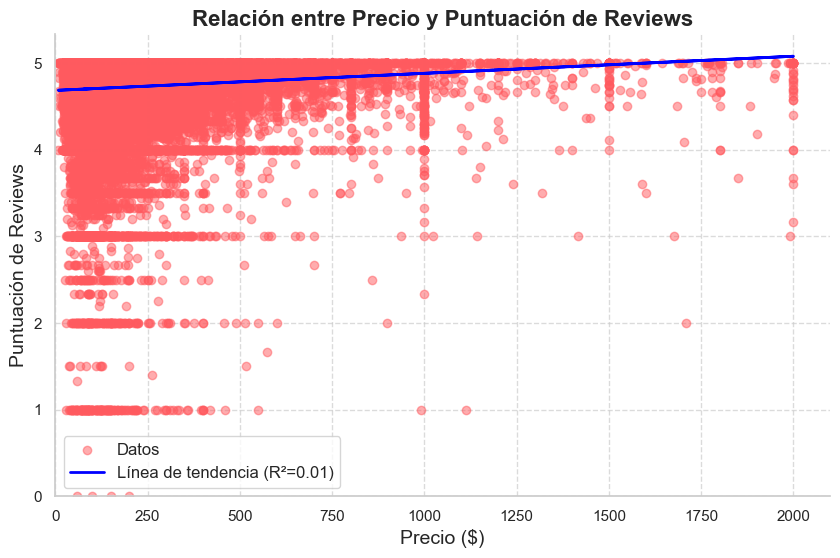

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_reviews[['price']]
y = df_reviews['review_scores_rating']

# Creamos y ajustamos un modelo de regresión lineal para el cálculo de R2
model = LinearRegression()
model.fit(X, y)

# Predecimos los valores de y
y_pred = model.predict(X)

# Calcular el valor de R2
r2 = r2_score(y, y_pred)
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_reviews['price'], df_reviews['review_scores_rating'], alpha=0.5, color='#FF5A5F', label='Datos')
plt.plot(df_reviews['price'], y_pred, color='blue', linewidth=2, label=f'Línea de tendencia (R²={r2:.2f})')
plt.title('Relación entre Precio y Puntuación de Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Precio ($)', fontsize=14)
plt.ylabel('Puntuación de Reviews', fontsize=14)
plt.legend(fontsize=12)

# Ajustar los límites del eje para que comiencen en 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Ocultar el eje superior y el derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Se puede observar que la mayoria de datos para reviews altas, entre 4-5 se agrupan antes de los 1000$. Lo que nos da una idea de que a mayor precio no implica unas mejores reseñas generales, aunque si nos fijamos por encima de los 1000$ las reviews suelen ser mayores de 3, como el promedio de las mismas. Sin embargo vamos a realizar una **prueba de correlación de Spearman** , ya que **las variables no se ajustan a una distribución *Gaussiana* .**

In [45]:
from scipy.stats import spearmanr
stat, p = spearmanr(X, y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.145, p=0.000
Probablemente dependientes


Parece ser que si que hay relación entre el precio y las reviews, así que para realizaremos una clasificación del precio en muy bajo, bajo, medio, alto, muy alto y compararemos el promedio de sus reviews en un gráfico de barras.

In [46]:
df['price'].describe()

count    94640.000000
mean       204.638715
std        217.609571
min          8.000000
25%         90.000000
50%        139.000000
75%        230.000000
max       2000.000000
Name: price, dtype: float64

In [47]:
'''En base a los cuartiles que hemos visto con la función describe, vamos a crear una nueva columna en el DataFrame que
indique si el precio es muy bajo, bajo, medio, alto o muy alto. Para ello, vamos a usar los siguientes intervalos:
Muy bajo : 0-50 
Bajo: 50-90 
Medio: 90-139 
Alto: 139-230 
Muy Alto: >230'''

bins = [0, 50, 90, 139, 230, 500, float('inf')]
labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto', 'Extremadamente alto']

df_reviews['price_classification'] = pd.cut(df_reviews['price'], bins=bins, labels=labels, right=False)
#También lo haremos para df por si la usamos más tarde
df['price_classification'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Verificar la nueva columna
print(df_reviews[['price', 'price_classification']].head())

   price price_classification
0  113.0                Medio
1   95.0                Medio
2  145.0                 Alto
3  180.0                 Alto
5   95.0                Medio


C:\Users\spide\AppData\Local\Temp\ipykernel_22480\316495021.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\spide\AppData\Local\Temp\ipykernel_22480\316495021.py:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



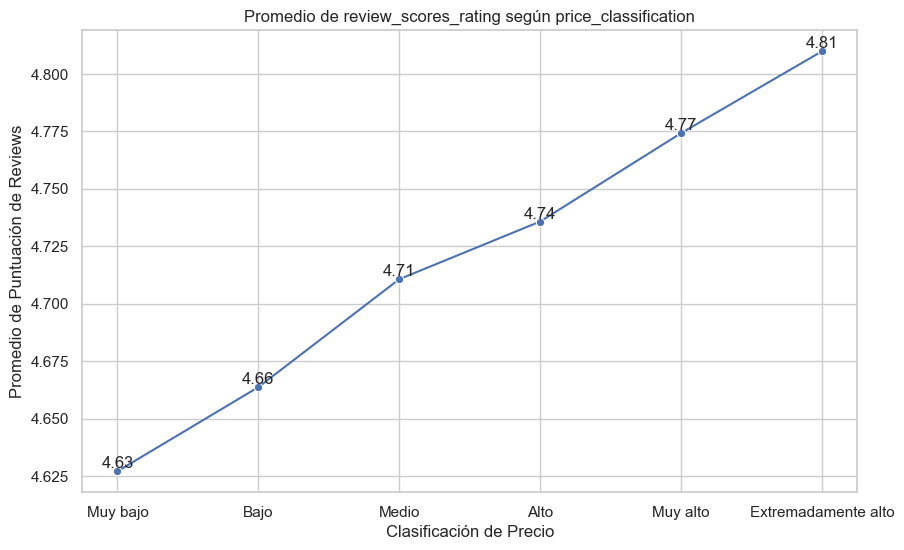

In [48]:

# Calcular el promedio de review_scores_rating por price_classification
avg_review_by_price_class = df_reviews.groupby('price_classification')['review_scores_rating'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='price_classification', y='review_scores_rating', data=avg_review_by_price_class, marker='o', palette='viridis')
plt.title('Promedio de review_scores_rating según price_classification')
plt.xlabel('Clasificación de Precio')
plt.ylabel('Promedio de Puntuación de Reviews')

# Añadir etiquetas de datos
for index, value in enumerate(avg_review_by_price_class['review_scores_rating']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Podemos observar que a precios mayores las reviews promedio son más positivas


### 3.2 - ¿Qué factores influyen están más relacionados con la puntuación general (*review_scores_rating*)?

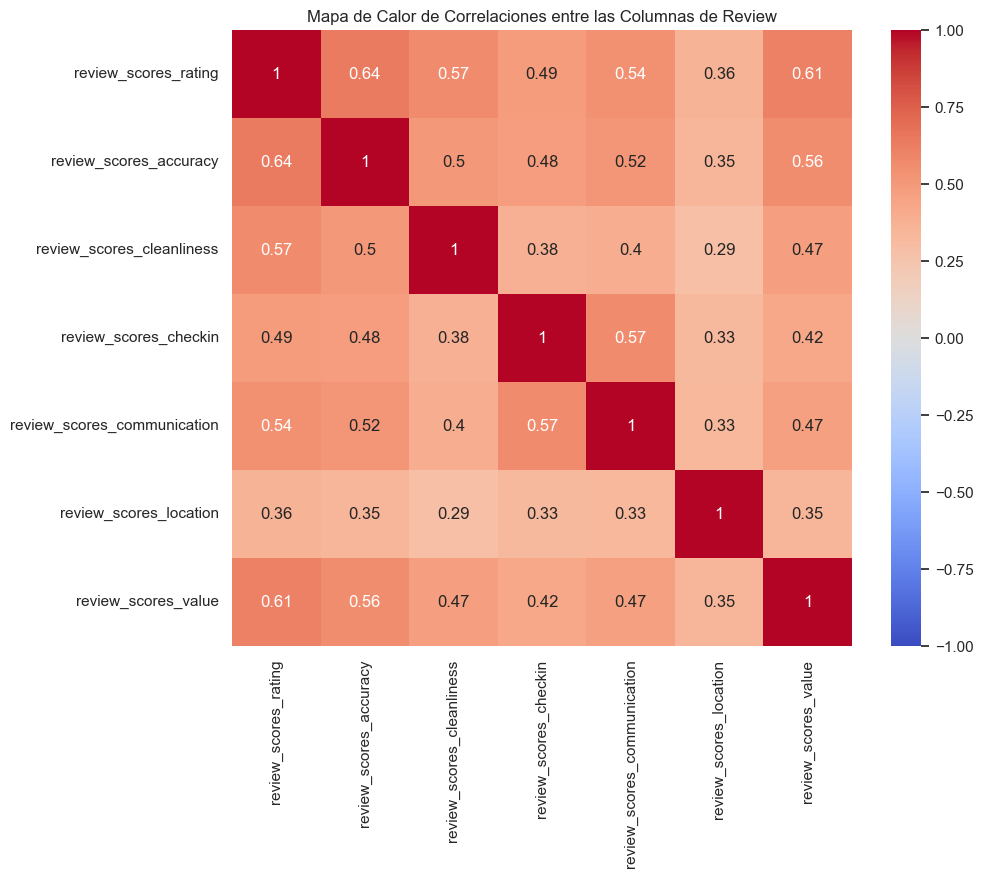

In [49]:
# Creamos una lista de las columnas de review que pasaremos a la matriz de correlación
review_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                  'review_scores_value']

# Calculamos la matriz de correlación de Kendall con las columnas de review con la función corr de pandas
correlation_matrix = df_reviews[review_columns].corr(method='kendall')

# Creamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones entre las Columnas de Review')
plt.show()

Podemos observar que los factores más influyentes en la puntuación general de los alojamientos són la **precisión del anuncio (0.64), la relación calidad-precio (0.61) y la limpieza (0.57)**.

### 3.3 - Top 20 mejores alojamientos según su relación calidad precio (*review_scores_value*)

In [50]:
# Ordenamos por 'review_scores_value' de forma descendente y 'price' de forma ascendente
df_reviews_sorted = df_reviews.sort_values(by=['review_scores_value', 'price'], ascending=[False, True])

# Filtrar el DataFrame para obtener el top 50 según 'review_scores_value' más alta y 'price' más bajo
top_50_reviews = df_reviews_sorted.head(50)

# Crear el mapa cloroplético
fig = px.scatter_mapbox(
    top_50_reviews,
    lat='latitude',
    lon='longitude',
    size='price',
    hover_name='neighbourhood_cleansed',  # Puedes cambiar esto a cualquier otra columna que desees mostrar al pasar el cursor
    hover_data={'latitude': False, 'longitude': False, 'price': True},  # Mostrar el precio en el hover
    labels={'review_scores_value': 'Relación Calidad-Precio', 'price': 'Precio ($)'},  # Cambiamos el nombre de la columna de review_scores_value
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",
    title='Top 20 alojamientos según la relación calidad-precio más alta y precio más bajo',
    color_discrete_sequence=['#FF5A5F']  # Cambiar el color de los puntos
)

# Mostrar el mapa
fig.show()

tabla_top_50 = top_50_reviews[['id','listing_url','neighbourhood_cleansed','price','review_scores_value']]
tabla_top_50

id                                       listing_url  \
3331               3666224              https://www.airbnb.com/rooms/3666224   
83445  1148998400630688729  https://www.airbnb.com/rooms/1148998400630688729   
14685             18353334             https://www.airbnb.com/rooms/18353334   
9703              11352142             https://www.airbnb.com/rooms/11352142   
15128             18996379             https://www.airbnb.com/rooms/18996379   
71822  1087465671624422127  https://www.airbnb.com/rooms/1087465671624422127   
19987             25965984             https://www.airbnb.com/rooms/25965984   
44999   754885427025620893   https://www.airbnb.com/rooms/754885427025620893   
11895             13726512             https://www.airbnb.com/rooms/13726512   
15805             19659553             https://www.airbnb.com/rooms/19659553   
16184             20026708             https://www.airbnb.com/rooms/20026708   
10183             12087727             https://www.airbnb.com/rooms/12087727   
4206               4812774              https://www.airbnb.com/rooms/4812774   
12115             13795865             https://www.airbnb.com/rooms/13795865   
16237             20033764             https://www.airbnb.com/rooms/20033764   
2260               2611868              https://www.airbnb.com/rooms/2611868   
6599               7158439              https://www.airbnb.com/rooms/7158439   
8859               9690108              https://www.airbnb.com/rooms/9690108   
9597              11171938             https://www.airbnb.com/rooms/11171938   
16281             20189776             https://www.airbnb.com/rooms/20189776   
25924             35997147             https://www.airbnb.com/rooms/35997147   
29802             42042015             https://www.airbnb.com/rooms/42042015   
63911  1022334352286295775  https://www.airbnb.com/rooms/1022334352286295775   
79977  1131810509689764378  https://www.airbnb.com/rooms/1131810509689764378   
87413  1172213504582816799  https://www.airbnb.com/rooms/1172213504582816799   
6945               7357881              https://www.airbnb.com/rooms/7357881   
11285             13198070             https://www.airbnb.com/rooms/13198070   
18976             24653721             https://www.airbnb.com/rooms/24653721   
23793             33084916             https://www.airbnb.com/rooms/33084916   
33127             48547867             https://www.airbnb.com/rooms/48547867   
84474  1155173837410395889  https://www.airbnb.com/rooms/1155173837410395889   
6580               7120055              https://www.airbnb.com/rooms/7120055   
13025             15491719             https://www.airbnb.com/rooms/15491719   
29220             41018692             https://www.airbnb.com/rooms/41018692   
80502  1134673374433647461  https://www.airbnb.com/rooms/1134673374433647461   
83009  1146392393781423808  https://www.airbnb.com/rooms/1146392393781423808   
8211               8965788              https://www.airbnb.com/rooms/8965788   
10084             11848342             https://www.airbnb.com/rooms/11848342   
14634             18154690             https://www.airbnb.com/rooms/18154690   
17704             22341128             https://www.airbnb.com/rooms/22341128   
18043             23010137             https://www.airbnb.com/rooms/23010137   
4873               5531880              https://www.airbnb.com/rooms/5531880   
7364               7739434              https://www.airbnb.com/rooms/7739434   
8462               9257847              https://www.airbnb.com/rooms/9257847   
10416             12402072             https://www.airbnb.com/rooms/12402072   
10720             12773907             https://www.airbnb.com/rooms/12773907   
11384             13365686             https://www.airbnb.com/rooms/13365686   
12095             13791115             https://www.airbnb.com/rooms/13791115   
12301             14114851             https://www.airbnb.com/rooms/14114851   
12315             139860

In [51]:
tabla_top_50['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Buttes-Montmartre      8
Passy                  7
Batignolles-Monceau    5
Popincourt             5
Ménilmontant           4
Buttes-Chaumont        4
Opéra                  3
Vaugirard              3
Entrepôt               2
Gobelins               2
Luxembourg             1
Élysée                 1
Bourse                 1
Panthéon               1
Palais-Bourbon         1
Hôtel-de-Ville         1
Reuilly                1
Name: count, dtype: int64

### 3.4 - La antigüedad del host tiene alguna relación con el promedio de reseñas?

In [52]:
df['host_since'] = pd.to_datetime(df['host_since'])


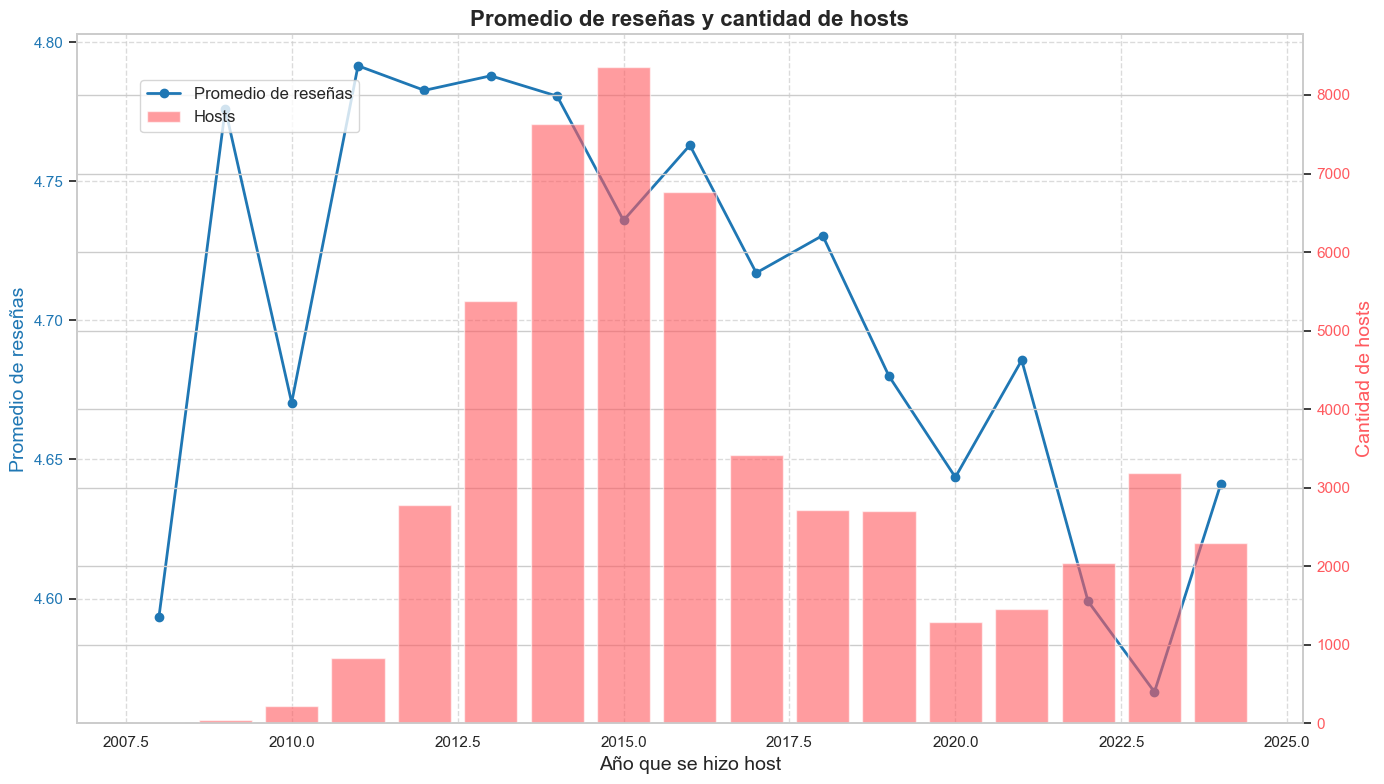

In [53]:
df_reviews['host_since'] = pd.to_datetime(df['host_since'])
df_reviews['host_since_year'] = df_reviews['host_since'].dt.year


# Calcular la cantidad de hosts únicos por año
unique_hosts_by_year = df_reviews.groupby('host_since_year')['host_id'].nunique().reset_index()
unique_hosts_by_year.rename(columns={'host_id': 'unique_hosts_count'}, inplace=True)

avg_review_by_host_since_year = df_reviews.groupby('host_since_year')['review_scores_rating'].mean().reset_index()

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de líneas (Promedio de review_scores_rating)
color_line = 'tab:blue'
ax1.set_title('Promedio de reseñas y cantidad de hosts', fontsize=16, fontweight='bold')
ax1.set_xlabel('Año que se hizo host', fontsize=14)
ax1.set_ylabel('Promedio de reseñas', color=color_line, fontsize=14)
ax1.plot(avg_review_by_host_since_year['host_since_year'], 
                 avg_review_by_host_since_year['review_scores_rating'], 
                 marker='o', color=color_line, label='Promedio de reseñas', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_line)
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje Y para la cantidad de hosts únicos
ax2 = ax1.twinx()  # Comparte el eje X con ax1
color_bar = '#FF5A5F'
ax2.set_ylabel('Cantidad de hosts', color=color_bar, fontsize=14)
ax2.bar(unique_hosts_by_year['host_since_year'], unique_hosts_by_year['unique_hosts_count'], 
                color=color_bar, alpha=0.6, label='Hosts')
ax2.tick_params(axis='y', labelcolor=color_bar)

# Añadir leyendas
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=12)

# Ajustar el diseño
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 4 - Anfititriones

### 4.1 - ¿Qué anfitriones tienen mayor número de propiedades?

Veamos los 20 propietarios con mayor número de propiedades

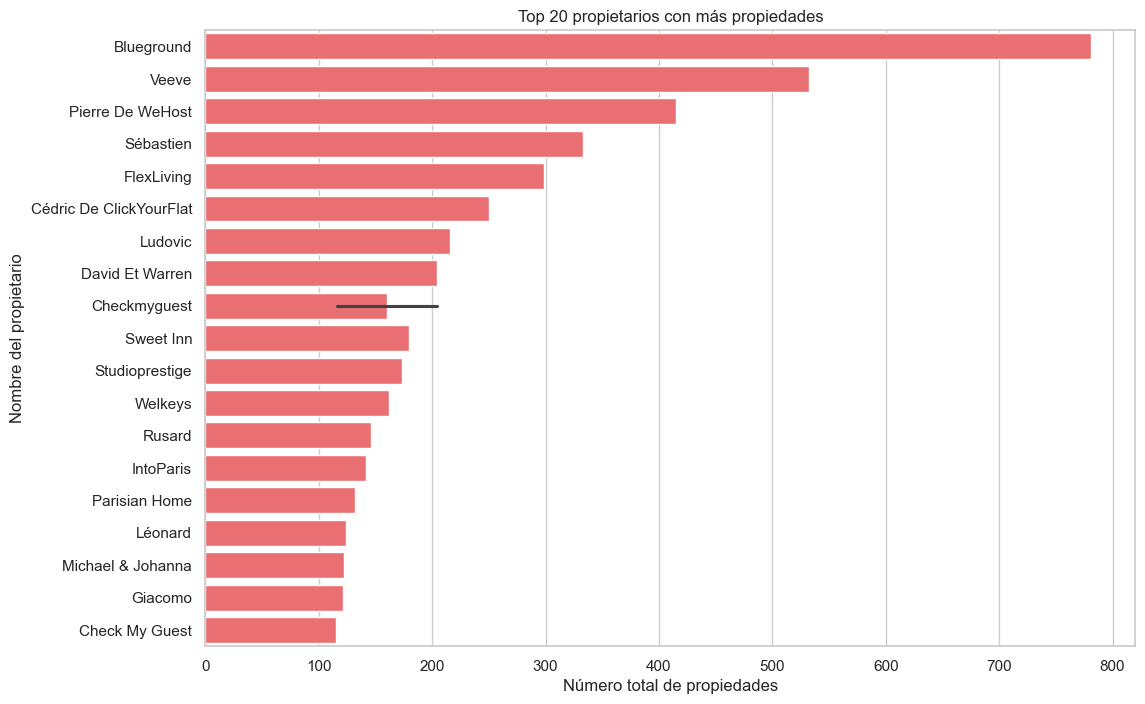

host_id                host_name  total_listings_count host_since
55310  314994947               Blueground                   781 2019-12-06
27217   33889201                    Veeve                   532 2015-05-21
33635   50502817         Pierre De WeHost                   415 2015-12-04
33766   50978178                Sébastien                   333 2015-12-10
60335  460047164               FlexLiving                   299 2022-05-20
23587   26981054  Cédric De ClickYourFlat                   250 2015-01-31
8952     7642792                  Ludovic                   216 2013-07-22
59403  436103373          David Et Warren                   204 2021-12-15
64318  528015349             Checkmyguest                   204 2023-07-26
33945   51567288                Sweet Inn                   180 2015-12-17
55859  335998296           Studioprestige                   173 2020-02-14
45077  125797498                  Welkeys                   162 2017-04-14
67301  564251645                   Rusard                   146 2024-02-27
945      1112584                IntoParis                   142 2011-09-05
59496  440295601            Parisian Home                   132 2022-01-13
59776  448405235                  Léonard                   124 2022-03-07
24285   28313443        Michael & Johanna                   122 2015-02-24
22319   24495283                  Giacomo                   121 2014-12-04
63077  512746089             Checkmyguest                   116 2023-05-02
62627  506389460           Check My Guest                   115 2023-03-21

In [54]:
# Agrupamos los datos por 'host_id' y contar el número de propiedades para cada anfitrión
top_20_anfitriones_con_mas_propiedades = df.groupby(['host_id', 'host_name']).agg({
    'id': 'count',
    'host_since': 'first'
}).reset_index()

# Renombrar la columna 'id' a 'total_listings_count' para mayor claridad
top_20_anfitriones_con_mas_propiedades.rename(columns={'id': 'total_listings_count'}, inplace=True)

# Ordenamos los datos por 'total_listings_count' de forma descendente y seleccionar los 20 principales
top_20_anfitriones_con_mas_propiedades = top_20_anfitriones_con_mas_propiedades.sort_values(by='total_listings_count', ascending=False).head(20)

# Crear un gráfico de barras para visualizar los 20 propietarios con más propiedades
plt.figure(figsize=(12, 8))
sns.barplot(x='total_listings_count', y='host_name', data=top_20_anfitriones_con_mas_propiedades, color='#FF5A5F')
plt.title('Top 20 propietarios con más propiedades')
plt.xlabel('Número total de propiedades')
plt.ylabel('Nombre del propietario')
plt.show()

top_20_anfitriones_con_mas_propiedades

### 4.2 - Análisis de los super-anfitriones

#### 4.2.1 - ¿Qué proporción de super anfitriones hay por barrio? 

In [55]:
# Ruta del archivo GeoJSON
geojson_path = r'C:\Users\spide\Desktop\Bootcamp\mi_entorno\Moodulo_2\Proyecto_final_modulo_2\Data_paris_septiembre\neighbourhoods.geojson'

# Cargar el archivo GeoJSON
with open(geojson_path, encoding='utf-8') as f:
    geojson = json.load(f)

# Supongamos que df es tu DataFrame y tiene las columnas 'neighbourhood_cleansed', 'host_is_superhost', 'latitude', y 'longitude'

# Calcular el número total de anfitriones por barrio
total_anfitriones_por_barrio = df.groupby('neighbourhood_cleansed')['host_id'].nunique().reset_index()
total_anfitriones_por_barrio.rename(columns={'host_id': 'total_anfitriones'}, inplace=True)

# Calcular el número de superanfitriones por barrio
superanfitriones_por_barrio = df[df['host_is_superhost'] == 't'].groupby('neighbourhood_cleansed')['host_id'].nunique().reset_index()
superanfitriones_por_barrio.rename(columns={'host_id': 'superanfitriones'}, inplace=True)

# Unir los dos DataFrames
anfitriones_por_barrio = pd.merge(total_anfitriones_por_barrio, superanfitriones_por_barrio, on='neighbourhood_cleansed', how='left')
anfitriones_por_barrio['superanfitriones'].fillna(0, inplace=True)

# Calcular el porcentaje de superanfitriones por barrio
anfitriones_por_barrio['porcentaje_superanfitriones'] = (anfitriones_por_barrio['superanfitriones'] / anfitriones_por_barrio['total_anfitriones']) * 100

# Crear el mapa cloroplético
fig = px.choropleth_mapbox(
    anfitriones_por_barrio,
    geojson=geojson,  # Archivo GeoJSON cargado
    locations='neighbourhood_cleansed',
    featureidkey="properties.neighbourhood",  # Ajusta esto según la estructura de tu archivo GeoJSON
    color='porcentaje_superanfitriones',
    color_continuous_scale=px.colors.sequential.Pinkyl,  # Escala de color con más tonalidades
    mapbox_style="carto-positron",
    zoom=10,
    center={"lat": 48.8566, "lon": 2.3522},  # Coordenadas del centro de París
    opacity=0.5,
    labels={'porcentaje_superanfitriones': 'Porcentaje de Superanfitriones'},
    title='Porcentaje de superanfitriones por Barrio'
)

# Actualizar las trazas para mostrar el texto con dos decimales
fig.update_traces(hovertemplate='%{location}<br>Porcentaje de Superanfitriones: %{z:.2f}%')

# Mostrar el mapa
fig.show()

C:\Users\spide\AppData\Local\Temp\ipykernel_22480\2613345521.py:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Podemos observar que hay más superanfitriones en las zonas más centricas de la ciudad que en las afueras

#### 4.2.2 - ¿Los alojamientos de super-anfitriones són más caros? 

In [56]:
df['host_is_superhost'].value_counts()

host_is_superhost
f    79501
t    15139
Name: count, dtype: int64

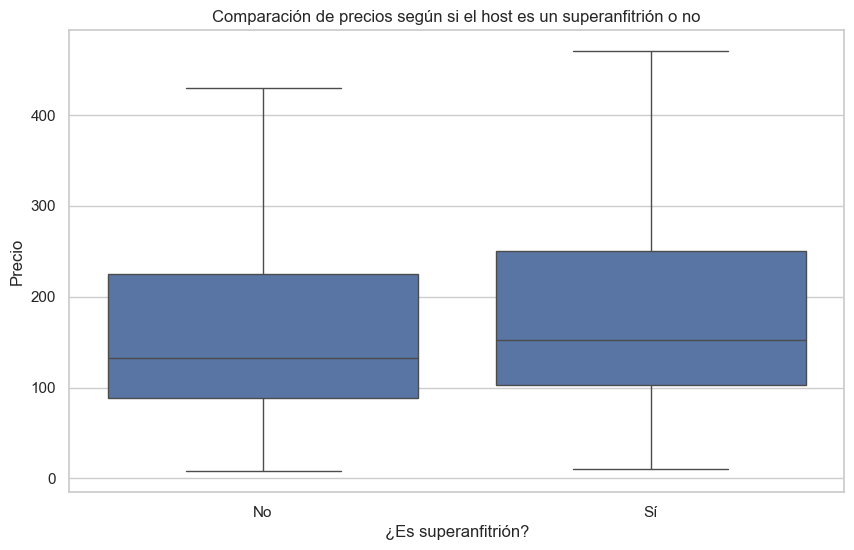

El valor estadístico para el conjunto 1 es: 8174.665017974476 y para el conjunto 2 es: 1369.0899157104213
Ambos conjuntos no siguen una distribución normal, se realiza una prueba de Mann-Whitney
El valor p para la prueba de Mann-Whitney es: 2.6784007558091687e-126
Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas


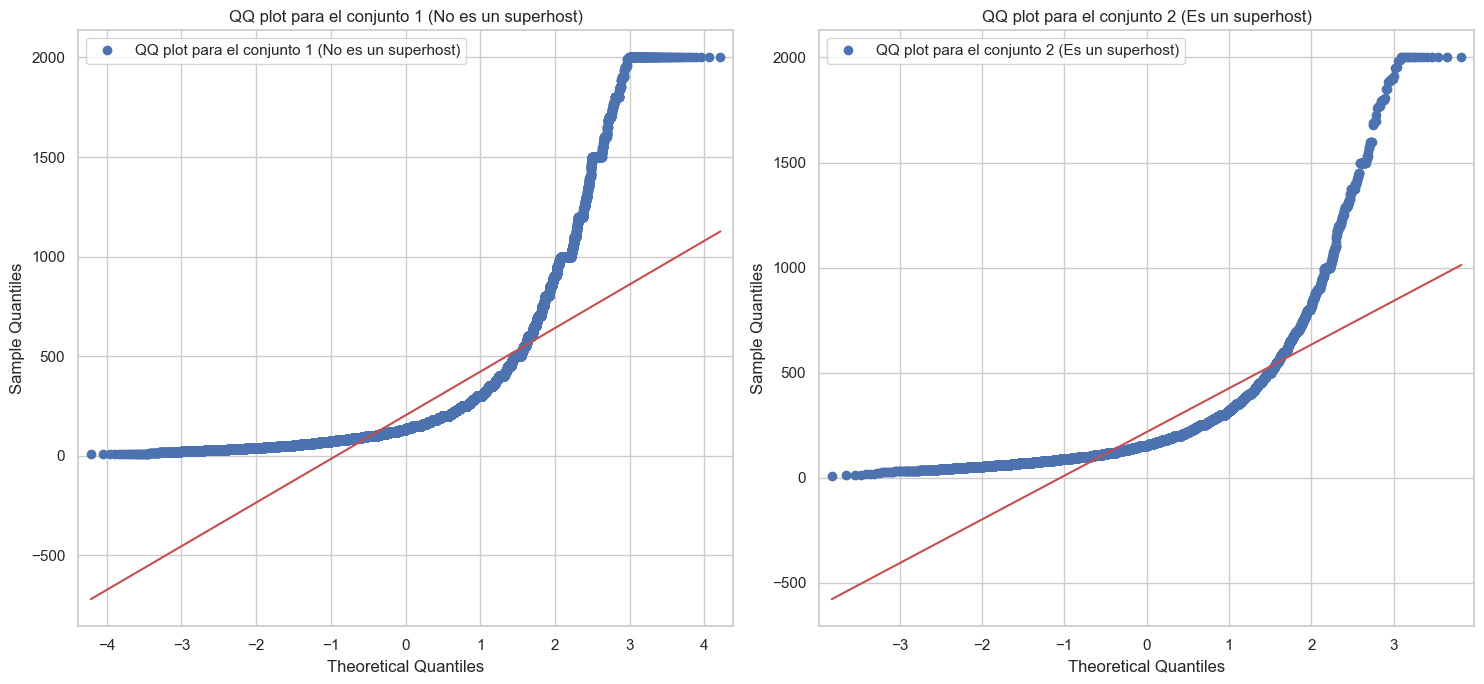

C:\Users\spide\AppData\Local\Temp\ipykernel_22480\2071424455.py:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




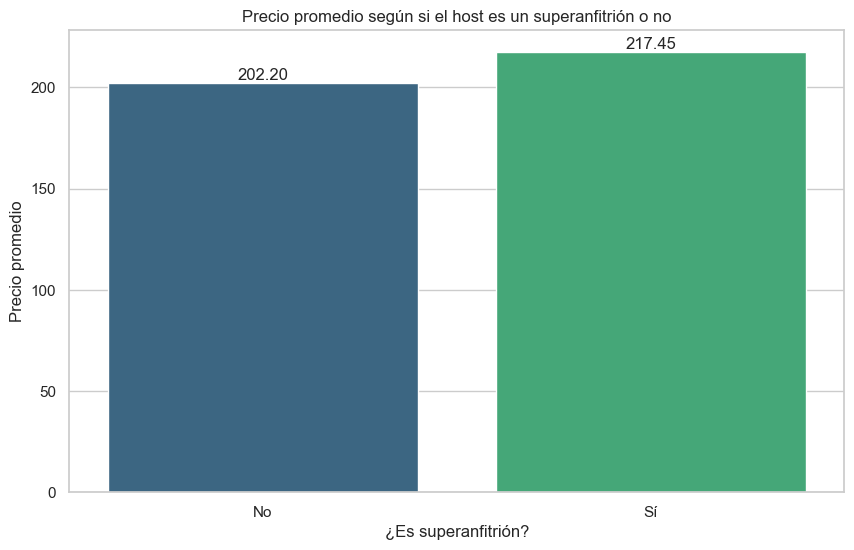

In [57]:
#Haremos la misma prueba para la variable host_is_superhost

# Visualizamos la distribución de los precios según si el host es superanfitrión o no en un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='price', data=df,showfliers=False)  # Crear el boxplot
plt.title('Comparación de precios según si el host es un superanfitrión o no')
plt.xlabel('¿Es superanfitrión?')
plt.ylabel('Precio')
plt.xticks(['f', 't'], ['No', 'Sí'])  # Cambiar etiquetas del eje x
plt.show()

# Creamos los dos conjuntos de datos para comparar los precios
superhost_false = df[df['host_is_superhost'] == 'f'][['price']]
superhost_true = df[df['host_is_superhost'] == 't'][['price']]
diagrama_flujo_test_hipótesis_Anderson_Darling(superhost_false,superhost_true, alpha = 0.05)

import statsmodels.api as sm
import matplotlib.pyplot as plt

def generar_qqplot(conjunto, titulo, ax):
    sm.qqplot(conjunto, line='s', ax=ax)
    ax.set_title(titulo)
    ax.legend([titulo])

# Asegúrate de pasar solo los valores de la columna 'price' como un array unidimensional
superhost_false_array = df[df['host_is_superhost'] == 'f']['price'].values
superhost_true_array = df[df['host_is_superhost'] == 't']['price'].values

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Generar QQ plots para ambos conjuntos
generar_qqplot(superhost_false_array, 'QQ plot para el conjunto 1 (No es un superhost)', axes[0])
generar_qqplot(superhost_true_array, 'QQ plot para el conjunto 2 (Es un superhost)', axes[1])

plt.tight_layout()
plt.show()
# Calcular el precio promedio según si es superanfitrión o no
avg_price_by_superhost = df.groupby('host_is_superhost')['price'].mean().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='host_is_superhost', y='price', data=avg_price_by_superhost, palette='viridis')
plt.title('Precio promedio según si el host es un superanfitrión o no')
plt.xlabel('¿Es superanfitrión?')
plt.ylabel('Precio promedio')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar etiquetas del eje x

# Añadir etiquetas de datos
for index, value in enumerate(avg_price_by_superhost['price']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


#### 4.2.3 - ¿Los super anfitriones tienen mejor puntuación general promedio?

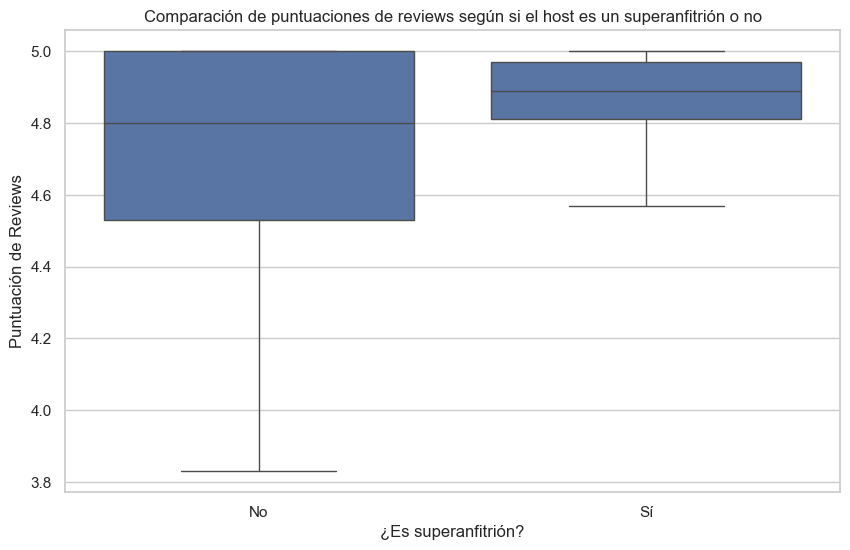

El valor estadístico para el conjunto 1 es: 3607.1399856089556 y para el conjunto 2 es: 791.0584432440064
Ambos conjuntos no siguen una distribución normal, se realiza una prueba de Mann-Whitney
El valor p para la prueba de Mann-Whitney es: 1.1457489343733485e-301
Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas


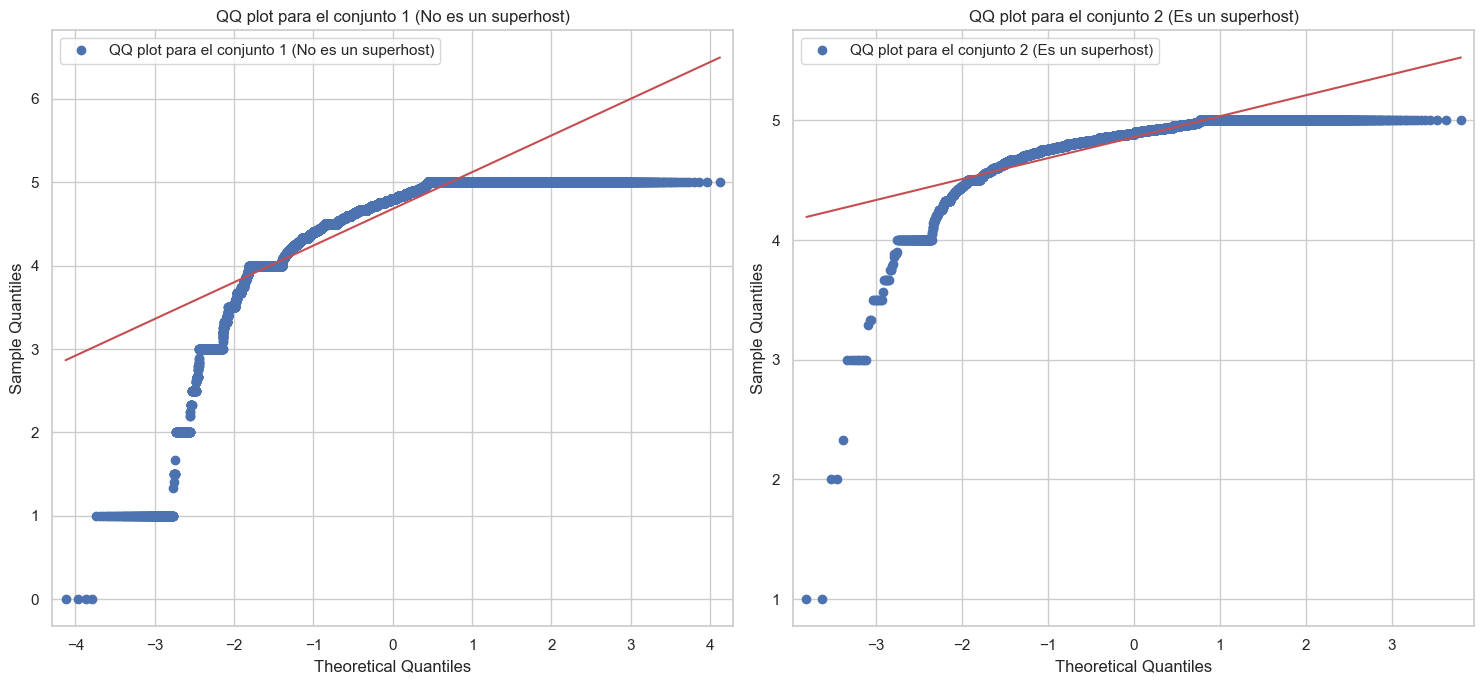

C:\Users\spide\AppData\Local\Temp\ipykernel_22480\1798953889.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




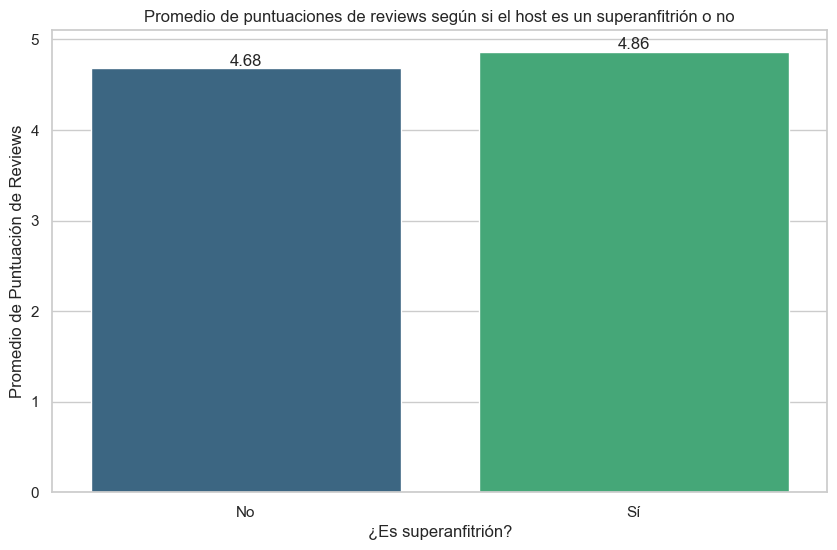

In [58]:
# Visualizamos la distribución de las puntuaciones de las reviews según si el host es superanfitrión o no en un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=df_reviews, showfliers=False)  # Creamos el boxplot
plt.title('Comparación de puntuaciones de reviews según si el host es un superanfitrión o no')
plt.xlabel('¿Es superanfitrión?')
plt.ylabel('Puntuación de Reviews')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiamos las etiquetas del eje x para hcerlo más claro
plt.show()

# Creamos los dos conjuntos de datos para comparar las puntuaciones de reviews
superhost_false_reviews = df_reviews[df_reviews['host_is_superhost'] == 'f'][['review_scores_rating']]
superhost_true_reviews = df_reviews[df_reviews['host_is_superhost'] == 't'][['review_scores_rating']]

# Realizamos la prueba de hipótesis
diagrama_flujo_test_hipótesis_Anderson_Darling(superhost_false_reviews, superhost_true_reviews, alpha=0.05)

# Generar QQ plots para ambos conjuntos
superhost_false_reviews_array = superhost_false_reviews['review_scores_rating'].values
superhost_true_reviews_array = superhost_true_reviews['review_scores_rating'].values

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
generar_qqplot(superhost_false_reviews_array, 'QQ plot para el conjunto 1 (No es un superhost)', axes[0])
generar_qqplot(superhost_true_reviews_array, 'QQ plot para el conjunto 2 (Es un superhost)', axes[1])

plt.tight_layout()
plt.show()
# Calcular el promedio de review_scores_rating según si el host es superanfitrión o no
avg_review_by_superhost = df_reviews.groupby('host_is_superhost')['review_scores_rating'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='host_is_superhost', y='review_scores_rating', data=avg_review_by_superhost, palette='viridis')
plt.title('Promedio de puntuaciones de reviews según si el host es un superanfitrión o no')
plt.xlabel('¿Es superanfitrión?')
plt.ylabel('Promedio de Puntuación de Reviews')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar etiquetas del eje x

# Añadir etiquetas de datos
for index, value in enumerate(avg_review_by_superhost['review_scores_rating']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [59]:
df.columns

Index(['id', 'listing_url', 'property_type', 'latitude', 'longitude', 'name',
       'host_id', 'host_name', 'host_url', 'has_availability', 'host_since',
       'neighbourhood_cleansed', 'room_type', 'accommodates',
       'host_is_superhost', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_total_listings_count', 'bathrooms',
       'Review?', 'accommodates_clasification', 'price_classification'],
      dtype='object')

In [60]:
df[df['Review?']=='Con review']['number_of_reviews'].describe()

count    68028.000000
mean        29.335230
std         61.110765
min          1.000000
25%          3.000000
50%         10.000000
75%         30.000000
max       3295.000000
Name: number_of_reviews, dtype: float64

**Conclusiones**
* Los súper anfitriones presentan un precio promedio más elevado
* Los súper anfitriones presentan unas mejores valoraciones promedio
